## Title: 
## Statistical Examination of Factors Affecting Student Performance


### Background and Problem Statement
Student exam performance may differ based on factors such as gender, parental education, test preparation, or lunch programs. This study applies statistical tests to explore whether these factors are associated with differences in math, reading, and writing exam scores. The goal is to identify statistical relationships rather than determine causal effects.
To do so, we first test for normality to determine the appropriate statistical approach. Depending on the distribution, we apply either parametric or non-parametric tests, using one-tailed or two-tailed analyses based on the research questions. When significant differences are found, post-hoc tests will be provided to gain further insights



### Research Question:
1. Demographic Factors and Academic Performance:
    - is there significant difference in math, reading, and writing score based on gender?
    - how does race/ethnicity influence academic performance accross math, reading, and writing scores?
2. Parental Education and Student Achievement:
    - Does parental level of education affect student performance in math, reading and writing?
    - are student whose parents have bachelors degree or higher more likely to score higher compared to those with lower educational background?
3. School Resource and Student Outcome:
    - does the type of lunch program impact academic performance?
        - are student on the free/reduced lunch program scoring significantly lower than those with standard lunch?
4. Test preparation and score improvement:
    - do student who completed a test preparation course perform better in math, reading, writing compared to those who did not?



### Hyphotesis
1. Demographic Factors and Academic Performance

    - H₀₁: There is no significant difference in math, reading, and writing scores between male and female students.
    - H₁₁: There is a significant difference in math, reading, and writing scores between male and female students.

    - H₀₂: There is no significant difference in academic performance across different race/ethnicity groups.
    - H₁₂: There is a significant difference in academic performance across different race/ethnicity groups.

2. Parental Education and Student Achievement

    - H₀₃: There is no significant difference in math, reading, and writing scores based on parental level of education.
    - H₁₃: There is a significant difference in math, reading, and writing scores based on parental level of education.

    - H₀₄: Students whose parents have a bachelor’s degree or higher do not perform significantly better than those whose parents have lower education levels.
    - H₁₄: Students whose parents have a bachelor’s degree or higher perform significantly better than those whose parents have lower education levels.


3. School Resources and Student Outcomes

    - H₀₅: There is no significant difference in academic performance between students receiving standard lunch and those on the free/reduced lunch program.
    - H₁₅: There is a significant difference in academic performance between students receiving standard lunch and those on the free/reduced lunch program.

4. Test Preparation and Score Improvement

    - H₀₆: Completing a test preparation course does not lead to significantly higher scores in math, reading, and writing.
    - H₁₆: Completing a test preparation course leads to significantly higher scores in math, reading, and writing.


    - H₀₇: Students on the free/reduced lunch program do not score significantly lower than those on the standard lunch program.
    - H₁₇: Students on the free/reduced lunch program score significantly lower than those on the standard lunch program.


In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import shapiro, normaltest, anderson, rankdata, kstest
import scipy.stats as stats
import scikit_posthocs as sp
from scipy import stats
from scipy.stats import mannwhitneyu, ttest_ind, kruskal

In [40]:
df = pd.read_csv('StudentsPerformance.csv')

In [41]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [43]:
unique_item = []

for i in df.columns:
    unique_item.append([i, df[i].nunique(), df[i].unique()])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],data=unique_item)
unique_values

,Column Name,Number of Unique,Unique Sample
0,gender,2,"[female, male]"
1,race/ethnicity,5,"[group B, group C, group A, group D, group E]"
2,parental level of education,6,"[bachelor's degree, some college, master's deg..."
3,lunch,2,"[standard, free/reduced]"
4,test preparation course,2,"[none, completed]"
5,math score,81,"[72, 69, 90, 47, 76, 71, 88, 40, 64, 38, 58, 6..."
6,reading score,72,"[72, 90, 95, 57, 78, 83, 43, 64, 60, 54, 52, 8..."
7,writing score,77,"[74, 88, 93, 44, 75, 78, 92, 39, 67, 50, 52, 4..."


In [44]:
df.describe().round(2)

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


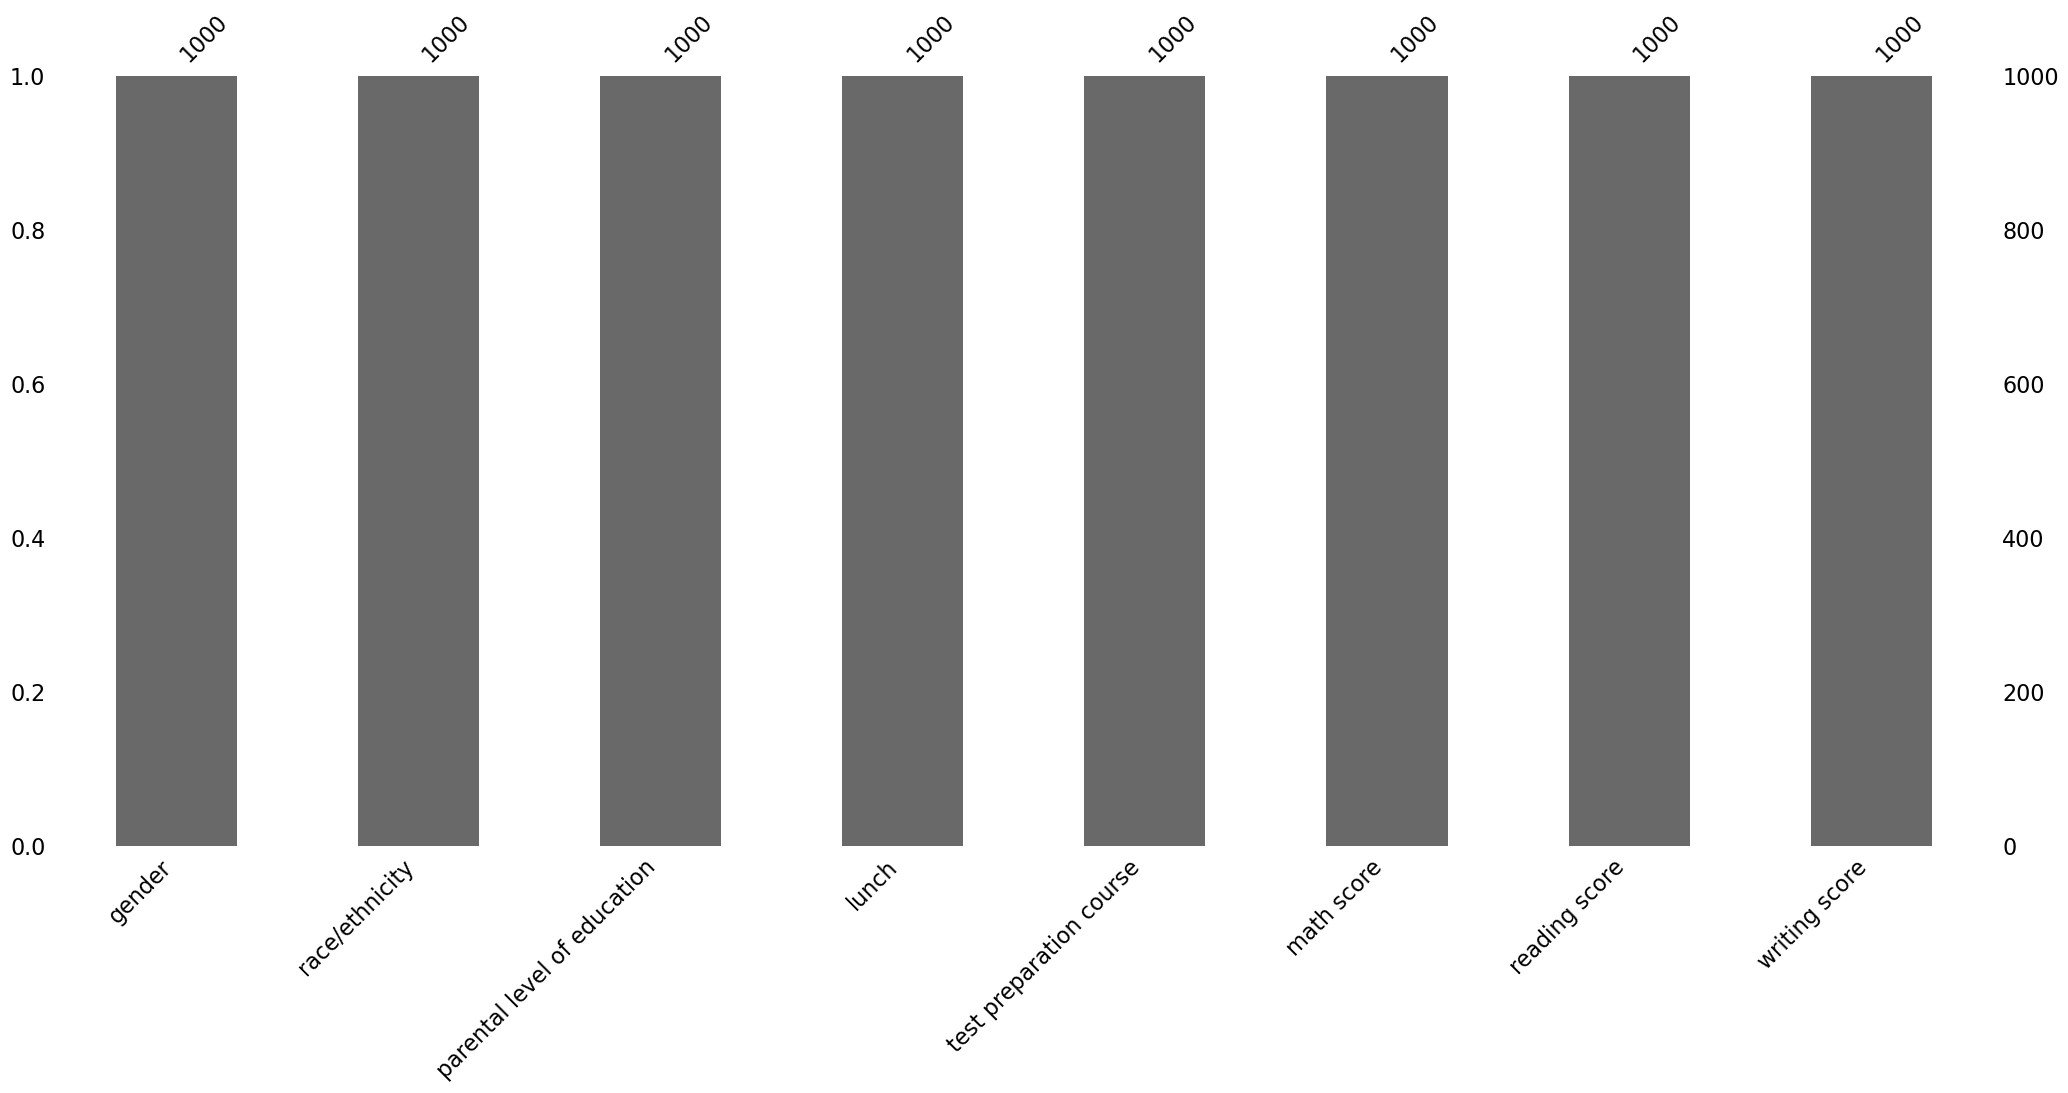

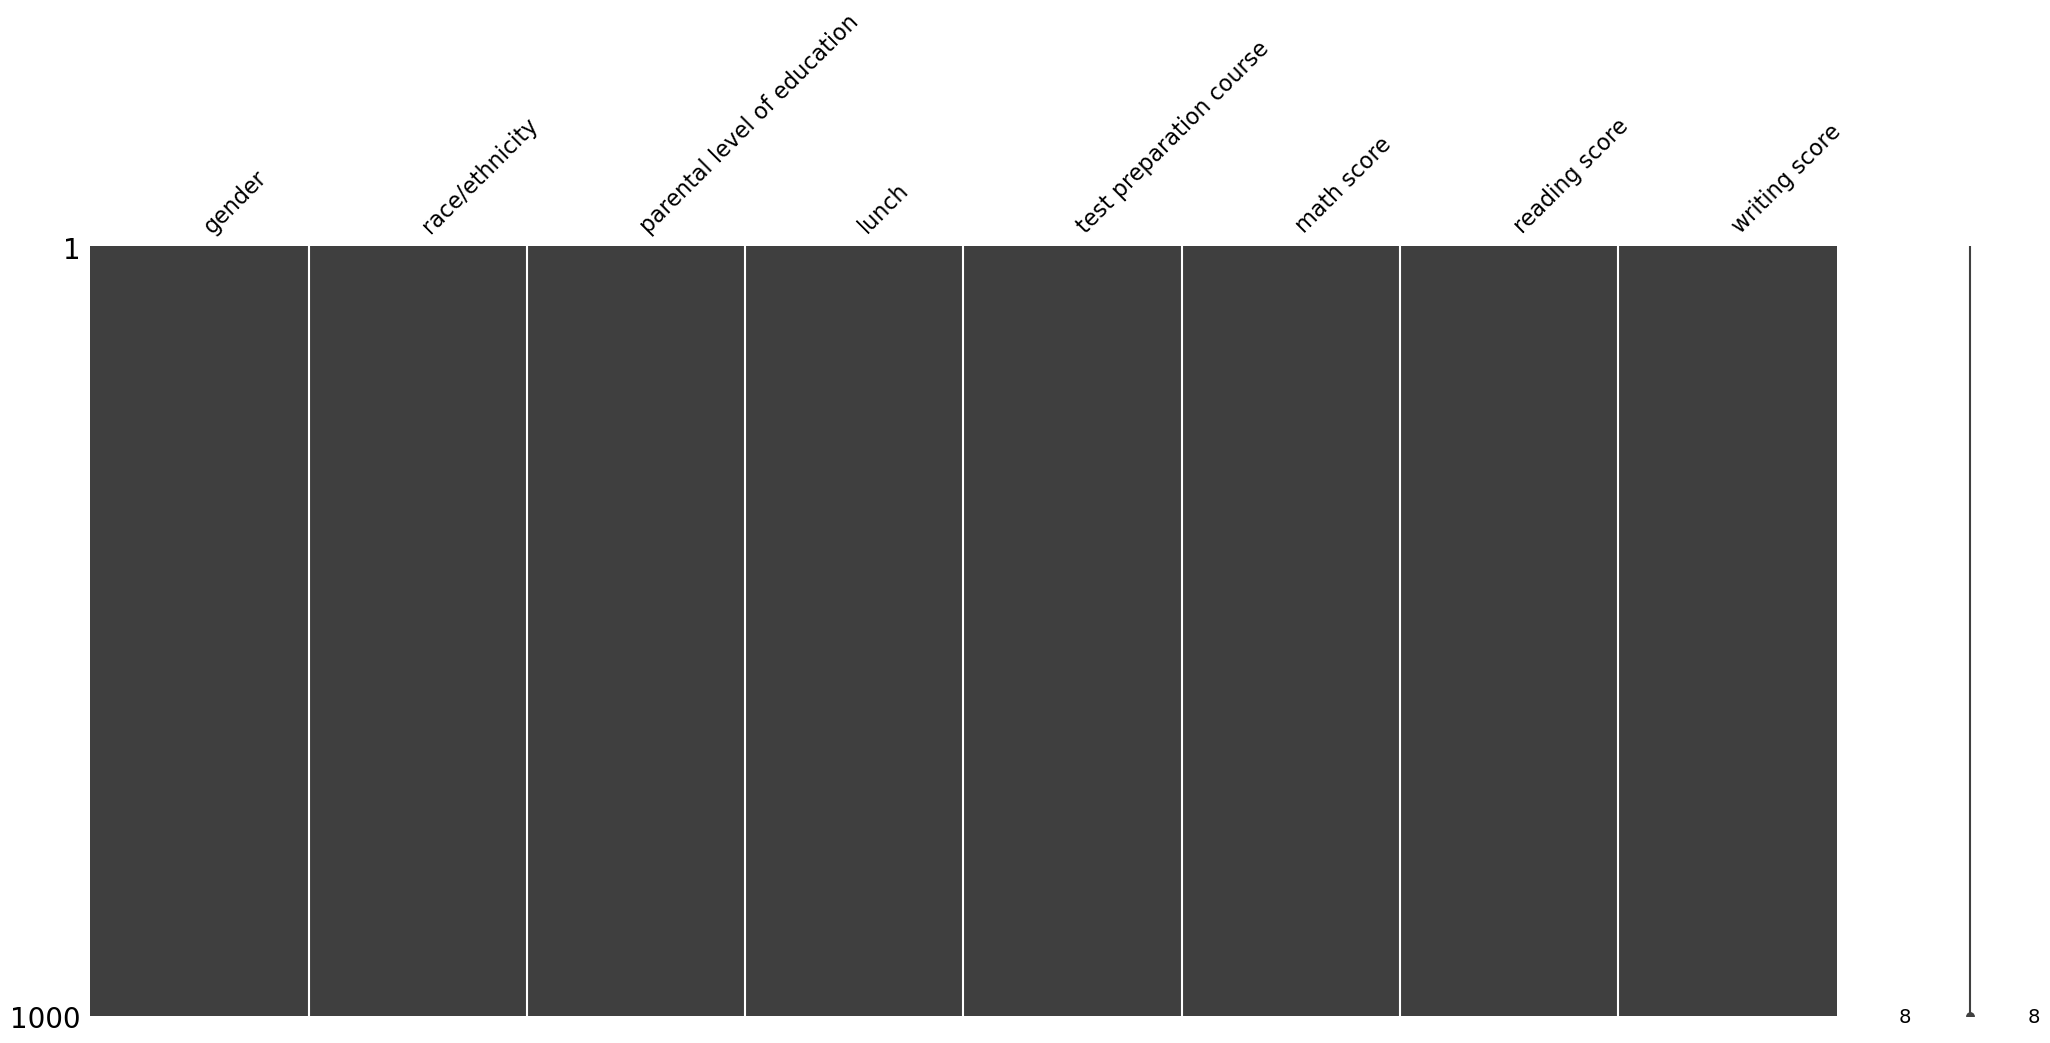

In [45]:
import missingno as msno

msno.bar(df)
plt.show()

# Visualisasi missing values dalam bentuk matrix
msno.matrix(df)
plt.show()


In [46]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Statistical Test

### Demographic Factors

In [47]:
gender_df = df['gender'].value_counts().reset_index()
gender_df.columns = ['gender', 'Count']
gender_df

,gender,Count
0,female,518
1,male,482


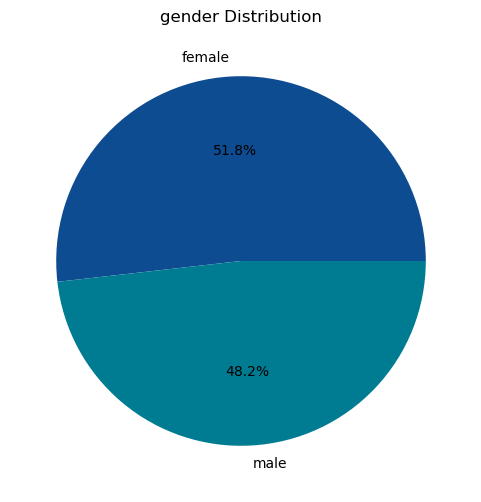

In [48]:
plt.figure(figsize=(6, 6))
plt.pie(gender_df['Count'], labels=gender_df['gender'], autopct='%1.1f%%', colors=sns.color_palette(["#0E4C92", "#007C92", "#00A6A6", "#6AD4DD", "#B4E1E8"]))
plt.title('gender Distribution')
plt.show()

In [49]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

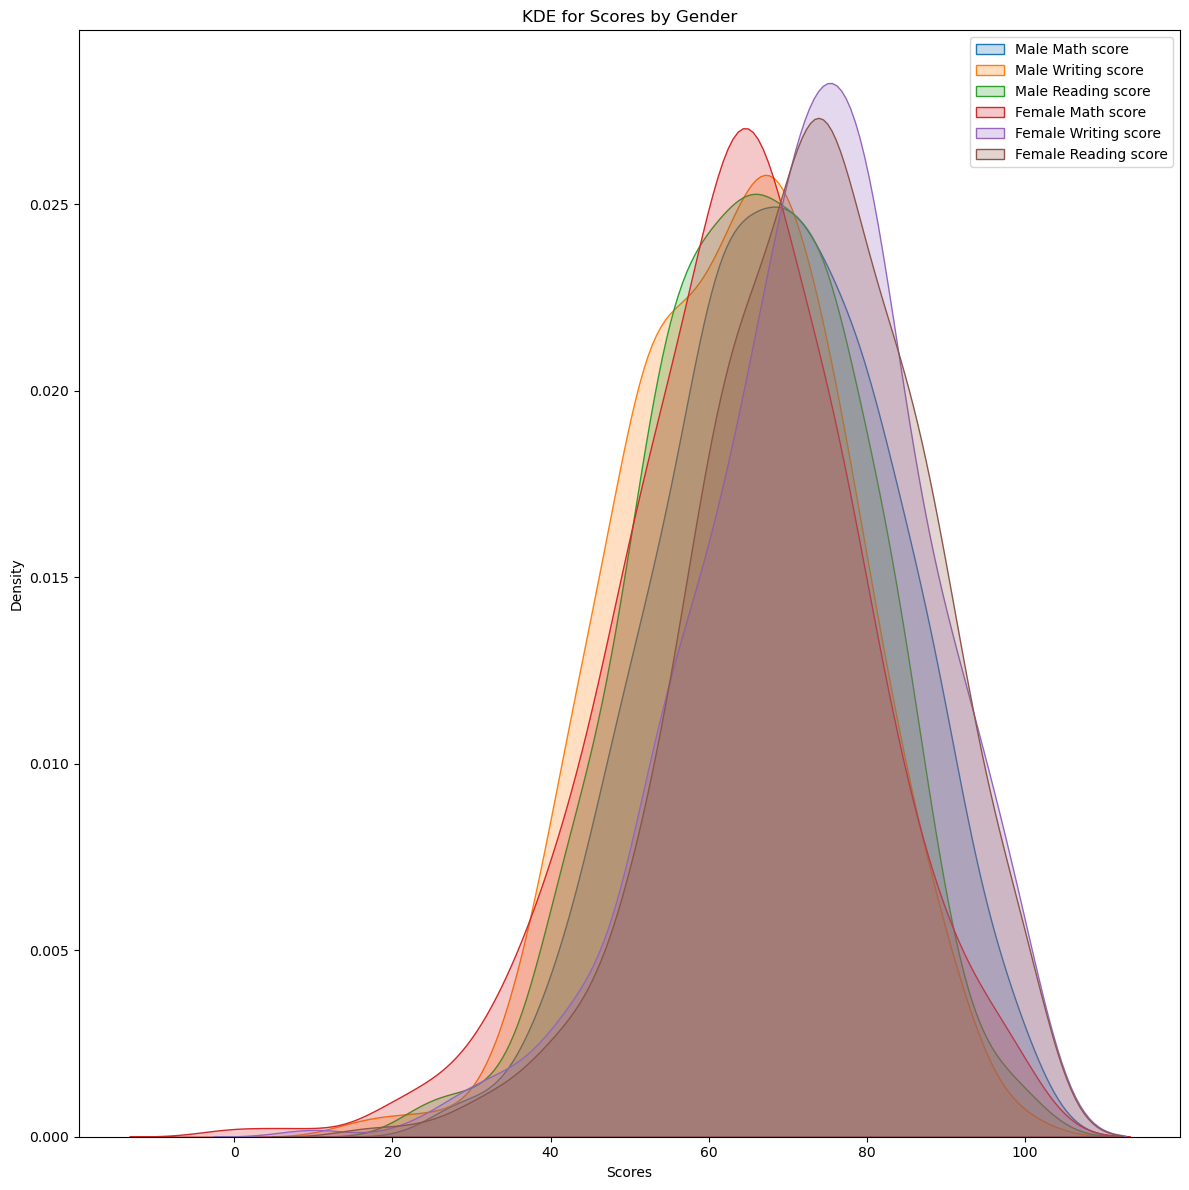

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to analyze
score_columns = ['math score', 'writing score', 'reading score']
genders = ['male', 'female']

plt.figure(figsize=(12, 12))

# Loop through each score and gender
for gender in genders:
    for score in score_columns:
        sns.kdeplot(data=df[df['gender'] == gender], x=score, label=f'{gender.capitalize()} {score.capitalize()}', fill=True)

# Add title and labels
plt.title('KDE for Scores by Gender')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


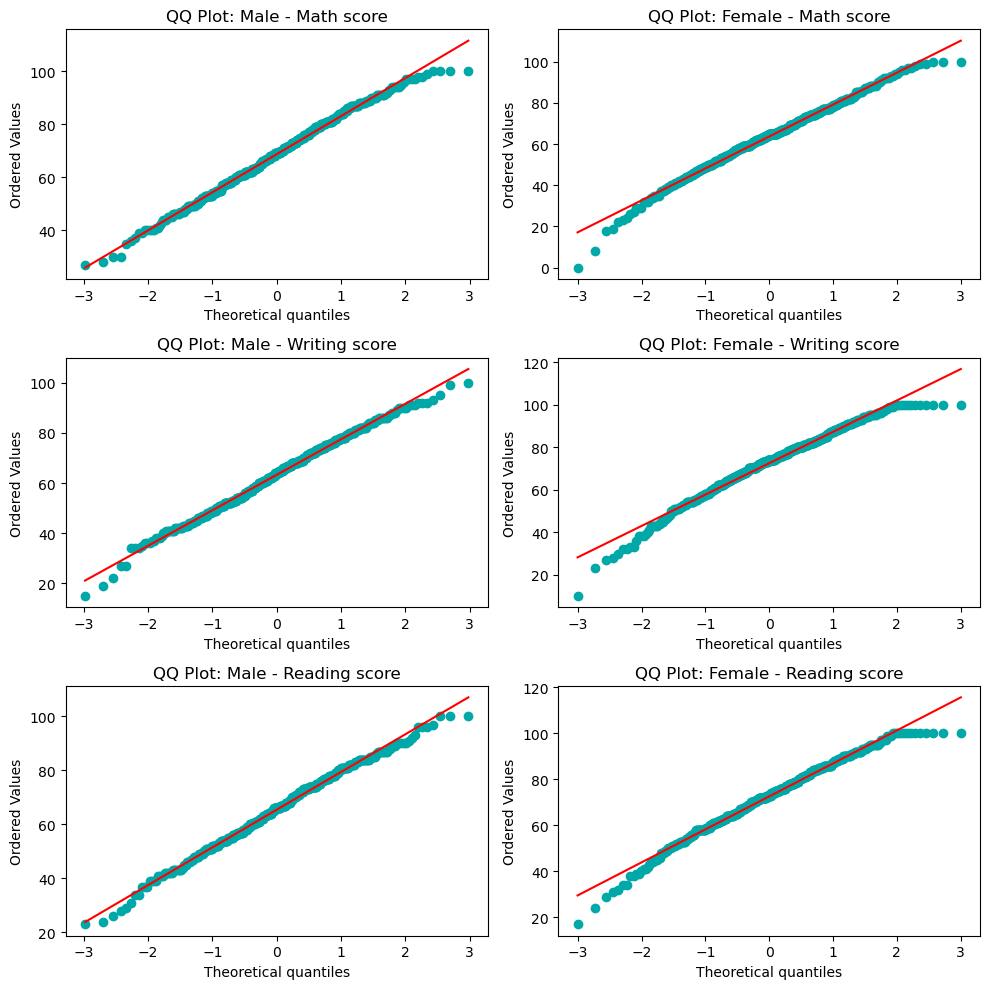

In [51]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Define score columns and gender categories
score_columns = ['math score', 'writing score', 'reading score']
genders = ['male', 'female']

# Create subplots
fig, axes = plt.subplots(len(score_columns), len(genders), figsize=(10, 10))

# Loop through each score and gender
for i, score in enumerate(score_columns):
    for j, gender in enumerate(genders):
        data = df[df['gender'] == gender][score]
        
        # QQ plot
        stats.probplot(data, dist="norm", plot=axes[i, j])
        axes[i, j].get_lines()[0].set_color('#00a8a8')
        axes[i, j].set_title(f'QQ Plot: {gender.capitalize()} - {score.capitalize()}')

plt.tight_layout()
plt.show()


In [52]:
gender_grouped = df.groupby('gender')[['math score', 'writing score', 'reading score']].agg(['mean', 'median','std'])
gender_grouped = gender_grouped.round(2).T
pd.options.display.float_format = "{:.2f}".format
gender_grouped

gender                female  male
math score    mean     63.63 68.73
              median   65.00 69.00
              std      15.49 14.36
writing score mean     72.47 63.31
              median   74.00 64.00
              std      14.84 14.11
reading score mean     72.61 65.47
              median   73.00 66.00
              std      14.38 13.93

from descriptive statistic above we can say that:
- male perform better in math
- female perform better in writing and reading

to understand whether such descriptive findings are statistically significant or just coincidence, we need to test them by interential statitstics.


In [53]:
# define columns to test
score_columns = ["math score", "reading score", "writing score"]

# empty list to be prepared the append in looping below
results = []

for score in score_columns: #looping subject score (math, reading, writing)
    for gender in df["gender"].unique(): #male female
        data = df[df["gender"] == gender][score] #filter
        shapiro_p = stats.shapiro(data).pvalue #normality test shapiro p value
        ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std())).pvalue #kolmogorov
        interpretation = "Normal" if shapiro_p > 0.05 else "Not normal"

        
        results.append([gender, score, shapiro_p, ks_p, interpretation]) #add to empty list

# Buat DataFrame agar lebih rapi
df_gender_normality = pd.DataFrame(results, columns=["Gender", "Score Type", "Shapiro-Wilk p-value", "Kolmogorov-Smirnov p-value", 'interpretation'])

# Format output agar lebih rapi
pd.set_option("display.float_format", "{:.5f}".format)
df_gender_normality


,Gender,Score Type,Shapiro-Wilk p-value,Kolmogorov-Smirnov p-value,interpretation
0,female,math score,0.00351,0.27548,Not normal
1,male,math score,0.03802,0.45190,Not normal
2,female,reading score,0.00005,0.19947,Not normal
3,male,reading score,0.08965,0.25751,Normal
4,female,writing score,0.00000,0.03851,Not normal
5,male,writing score,0.10401,0.41626,Normal


Since most of the data is not normal, if statistical analysis or models that assume normality are used, the results might be biased or invalid. Therefore, we may need to consider non-parametric statistical methods that do not rely on the assumption of normality.


because of two independent group: male and female, then we are going to use Mann-Whitney U test

In [54]:
# Store results
results = []

for score in score_columns:
    female_scores = df[df["gender"] == "female"][score]
    male_scores = df[df["gender"] == "male"][score]
    
    # use the Mann-Whitney U test to compare two groups (male vs female)
    test_stat, p_value = mannwhitneyu(male_scores, female_scores)
    
    # Store the results
    results.append([score, test_stat, p_value])

# Create a DataFrame for a clean display
df_gender_test = pd.DataFrame(results, columns=["Score Type", "Mann-Whitney U Test Statistic", "p-value"])
pd.set_option("display.float_format", "{:.5f}".format)
df_gender_test


,Score Type,Mann-Whitney U Test Statistic,p-value
0,math score,147907.50000,0.00000
1,reading score,89168.00000,0.00000
2,writing score,79719.50000,0.00000


- Math Score: There is a significant difference in math scores between male and female students.
- Writing Score: There is a significant difference in writing scores between male and female students.
- Reading Score: There is a significant difference in reading scores between male and female students.

Since the p-values are all below 0.05, we can reject the null hypothesis for each score type. This means the distributions of scores for males and females are significantly different across all three subjects

In [55]:
# Function to calculate Cliff's Delta
def cliffs_delta_manual(x, y):
    x, y = np.array(x), np.array(y)
    n_x, n_y = len(x), len(y)
    greater = np.sum(x[:, None] > y)
    less = np.sum(x[:, None] < y)
    delta = (greater - less) / (n_x * n_y)
    
    # Interpretation based on effect size
    abs_delta = abs(delta)
    if abs_delta > 0.474:
        interpretation = "Large effect"
    elif abs_delta > 0.33:
        interpretation = "Medium effect"
    elif abs_delta > 0.147:
        interpretation = "Small effect"
    else:
        interpretation = "Negligible effect"
    
    return delta, interpretation

# Score types
score_types = ["math score", "reading score", "writing score"]

# Calculate Cliff’s Delta for each score type
for score in score_types:
    delta, interpretation = cliffs_delta_manual(
        df[df["gender"] == "male"][score],
        df[df["gender"] == "female"][score]
    )
    print(f"{score}: Cliff's Delta = {delta:.3f} ({interpretation})")


math score: Cliff's Delta = 0.185 (Small effect)
reading score: Cliff's Delta = -0.286 (Small effect)
writing score: Cliff's Delta = -0.361 (Medium effect)


we can interpret the effect sizes for gender differences in academic performance. 

- x is male, y is female
- cliff's delta for math means that males score slightly higher than females, but the different/effect is minor
- for reading score, females are better than males, but again, the effect is minor
- writing score: the effect is consider medium. it also means, because it is negative, then females outperform males significantly in writing


Conclusions: statistical descriptive data are consistent with results from non-parametric tests such as Mann-Whitney U and Cliff's Delt analysis 

RQ 1a: is there significant difference in math, reading, and writing score based on gender? 

- H₀₁: There is no significant difference in math, reading, and writing scores between male and female students.
- H₁₁: There is a significant difference in math, reading, and writing scores between male and female students. ✅

### Ethnicity

In [56]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [57]:
etnicity_df = df['race/ethnicity'].value_counts().reset_index()
etnicity_df.columns = ['Ethnicity', 'Count']
etnicity_df


,Ethnicity,Count
0,group C,319
1,group D,262
2,group B,190
3,group E,140
4,group A,89


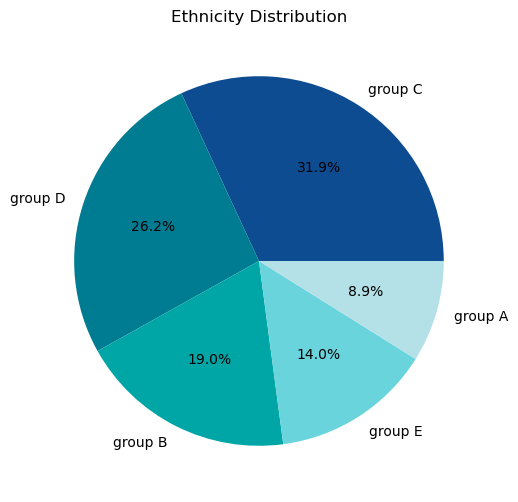

In [58]:
plt.figure(figsize=(6, 6))
plt.pie(etnicity_df['Count'], labels=etnicity_df['Ethnicity'], autopct='%1.1f%%', colors=sns.color_palette(["#0E4C92", "#007C92", "#00A6A6", "#6AD4DD", "#B4E1E8"]))
plt.title('Ethnicity Distribution')
plt.show()

- there are more than two groups. that being said that Mann-Whitney U will no longer be used like previous applied step.
- if we find the data is normally distributed then we may apply ANOVA. but, if we find that normality test (Shapiro or Kolmogorov) p-value > 0.05, we are going to use Kruskal-Wallis

In [59]:
race_grouped = df.groupby('race/ethnicity')[['math score', 'writing score', 'reading score']].agg(['mean', 'median','std'])
race_grouped = race_grouped.round(2).T
pd.options.display.float_format = "{:.2f}".format
race_grouped

race/ethnicity        group A  group B  group C  group D  group E
math score    mean      61.63    63.45    64.46    67.36    73.82
              median    61.00    63.00    65.00    69.00    74.50
              std       14.52    15.47    14.85    13.77    15.53
writing score mean      62.67    65.60    67.83    70.15    71.41
              median    62.00    67.00    68.00    72.00    72.00
              std       15.47    15.63    14.98    14.37    15.11
reading score mean      64.67    67.35    69.10    70.03    73.03
              median    64.00    67.00    71.00    71.00    74.00
              std       15.54    15.18    14.00    13.90    14.87

- in math, group E has greater mean and median score than the others but std also high
- in writing, group E is also has greater mean score, slightly above group D and has same median, but std is greater compared to D
- in reading, group E leads

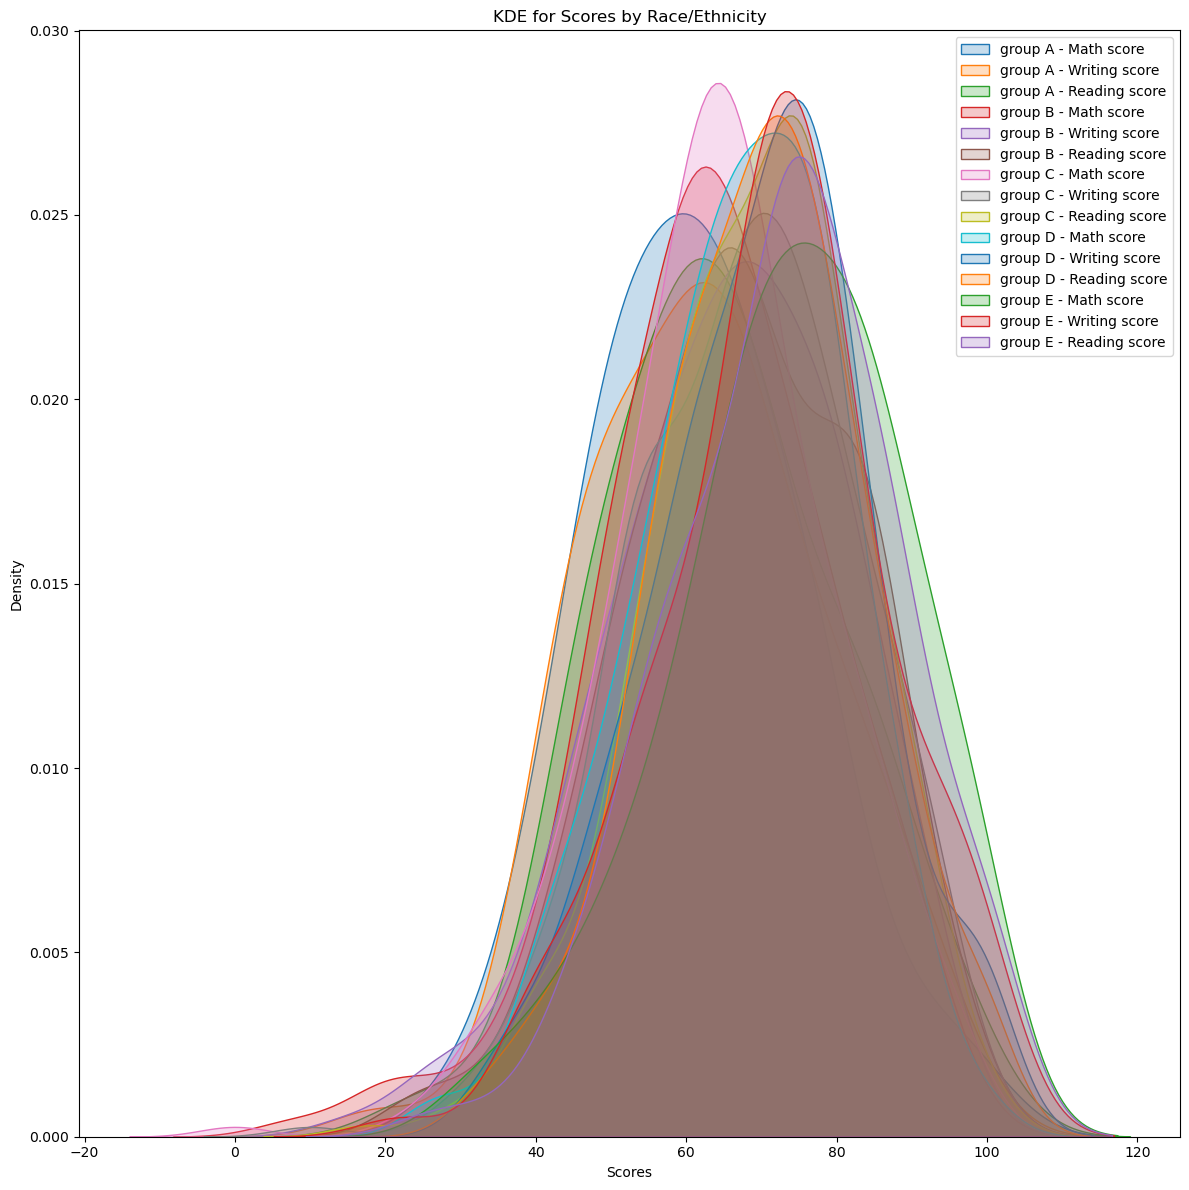

In [60]:
# List of columns to analyze
score_columns = ['math score', 'writing score', 'reading score']
ethnicity_groups = ['group A', 'group B', 'group C', 'group D', 'group E']  # Correct the order

plt.figure(figsize=(12, 12))

# Loop through each score and ethnicity group
for ethnicity in ethnicity_groups:
    for score in score_columns:
        sns.kdeplot(data=df[df['race/ethnicity'] == ethnicity], x=score, 
                    label=f'{ethnicity} - {score.capitalize()}', fill=True)

# Add title and labels
plt.title('KDE for Scores by Race/Ethnicity')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


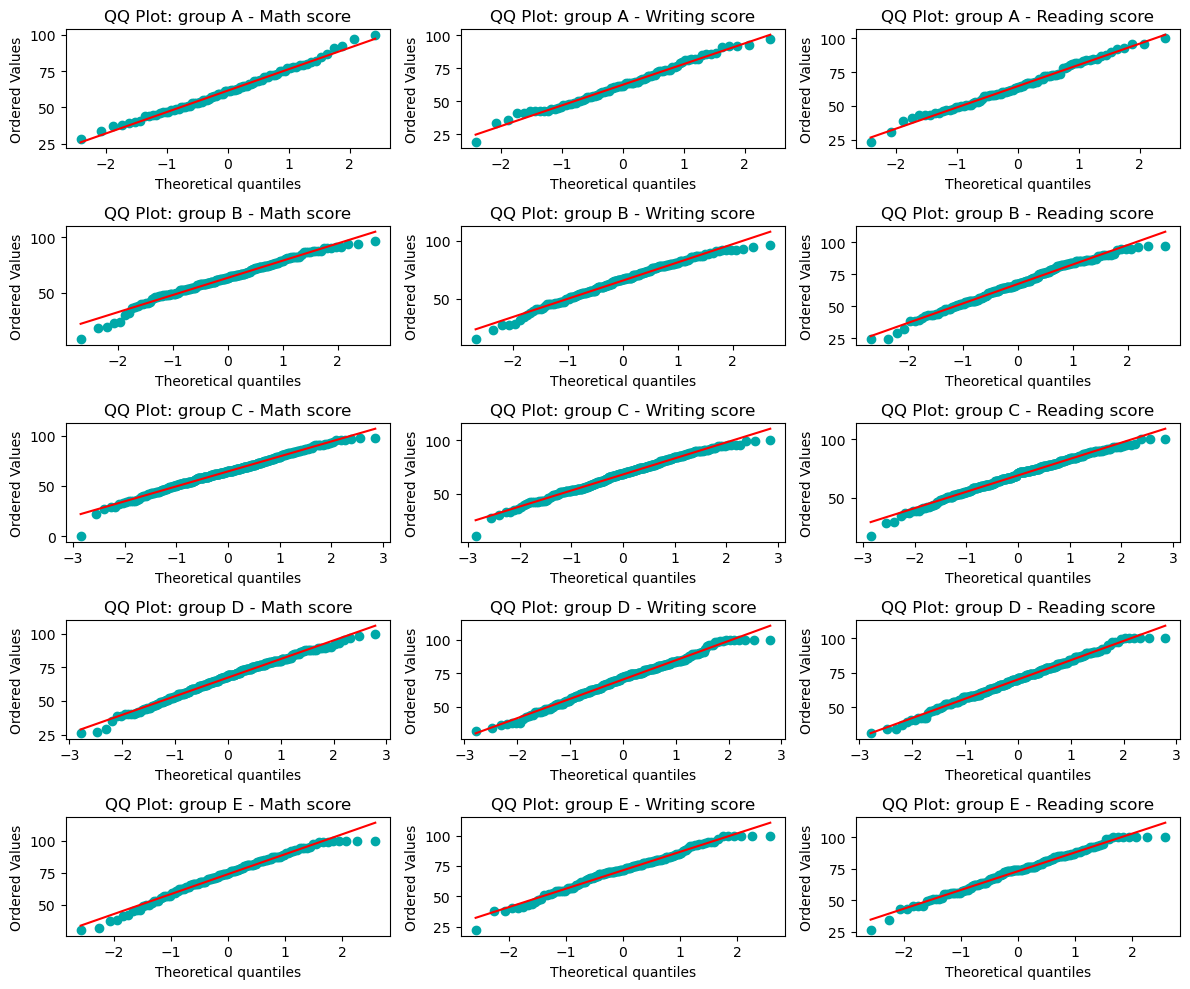

In [61]:
score_columns = ['math score', 'writing score', 'reading score']
ethnicity_groups = ['group A', 'group B', 'group C', 'group D', 'group E']

# Create subplots
fig, axes = plt.subplots(len(ethnicity_groups), len(score_columns), figsize=(12, 10))

# Loop through each score and ethnicity group
for i, ethnicity in enumerate(ethnicity_groups):
    for j, score in enumerate(score_columns):
        stats.probplot(df[df['race/ethnicity'] == ethnicity][score], dist="norm", plot=axes[i, j])
        axes[i, j].set_title(f'QQ Plot: {ethnicity} - {score.capitalize()}')
        axes[i, j].get_lines()[0].set_color('#00a8a8')

plt.tight_layout()
plt.show()


/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_5765/3703082181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='race/ethnicity', y='math score', palette="Blues")


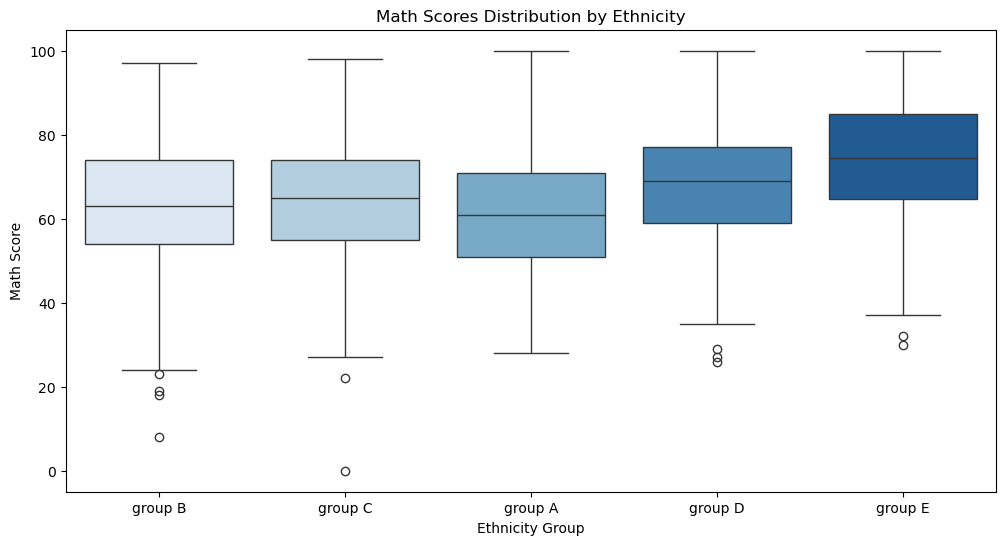

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='race/ethnicity', y='math score', palette="Blues")
plt.title('Math Scores Distribution by Ethnicity')
plt.xlabel('Ethnicity Group')
plt.ylabel('Math Score')
plt.show()


In [63]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [64]:
normality_results = []

for score in score_columns:
    for race in df['race/ethnicity'].unique():
        group_scores = df[df['race/ethnicity'] == race][score]
        sw_p = shapiro(group_scores)[1]
        ks_p = stats.kstest((group_scores - group_scores.mean()) / group_scores.std(), 'norm')[1]
        interpretation = "Normal" if sw_p > 0.05 else "Not normal"

        normality_results.append({
            'Race/Ethnicity': race,
            'Score Type': score,
            'Shapiro-Wilk p-value': sw_p,
            'Kolmogorov-Smirnov p-value': ks_p,
            'Interpretation': interpretation
        })

normality_df = pd.DataFrame(normality_results)
normality_df


,Race/Ethnicity,Score Type,Shapiro-Wilk p-value,Kolmogorov-Smirnov p-value,Interpretation
0,group B,math score,0.01,0.55,Not normal
1,group C,math score,0.02,0.33,Not normal
2,group A,math score,0.85,0.99,Normal
3,group D,math score,0.06,0.37,Normal
4,group E,math score,0.02,0.87,Not normal
5,group B,writing score,0.02,0.64,Not normal
6,group C,writing score,0.02,0.75,Not normal
7,group A,writing score,0.60,0.98,Normal
8,group D,writing score,0.05,0.23,Not normal
9,group E,writing score,0.07,0.39,Normal


decision: use non parametric, Kruskal-Wallis.

In [65]:
kruskal_results = []

for score in score_columns:
    groups = [df[df['race/ethnicity'] == race][score] for race in df['race/ethnicity'].unique()]
    stat, p = kruskal(*groups)
    kruskal_results.append({'Score Type': score, 'Kruskal-Wallis Statistic': stat, 'p-value': p})

kruskal_df = pd.DataFrame(kruskal_results)
kruskal_df


,Score Type,Kruskal-Wallis Statistic,p-value
0,math score,57.08,0.00
1,writing score,26.61,0.00
2,reading score,21.35,0.00


Since all p-values are < 0.05, we reject the null hypothesis (H₀₂) and conclude that there is a significant difference in academic performance across different race/ethnicity groups for math, reading, and writing scores

as we know that Kruskal-Wallis only tells at least one group differs, and nothing to do with which group has significance difference, we are going to undertake post hoc test namely Dunn's Test.

The idea is if the p-value < 0.05, we'll say the difference is statistically significant, likewise.

In [66]:
pip install scikit-posthocs


DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/fonttools-4.54.1-py3.11-macosx-11.0-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/poli_sci_kit-1.1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [67]:
for score in ['math score', 'reading score', 'writing score']:
    posthoc = sp.posthoc_dunn(df, val_col=score, group_col='race/ethnicity', p_adjust='bonferroni')
    print(f"\nDunn’s Test for {score}:\n")
    print(posthoc)



Dunn’s Test for math score:

         group A  group B  group C  group D  group E
group A     1.00     1.00     0.67     0.01     0.00
group B     1.00     1.00     1.00     0.07     0.00
group C     0.67     1.00     1.00     0.13     0.00
group D     0.01     0.07     0.13     1.00     0.00
group E     0.00     0.00     0.00     0.00     1.00

Dunn’s Test for reading score:

         group A  group B  group C  group D  group E
group A     1.00     1.00     0.08     0.03     0.00
group B     1.00     1.00     1.00     0.97     0.01
group C     0.08     1.00     1.00     1.00     0.11
group D     0.03     0.97     1.00     1.00     0.40
group E     0.00     0.01     0.11     0.40     1.00

Dunn’s Test for writing score:

         group A  group B  group C  group D  group E
group A     1.00     0.82     0.04     0.00     0.00
group B     0.82     1.00     1.00     0.05     0.01
group C     0.04     1.00     1.00     0.77     0.20
group D     0.00     0.05     0.77     1.00     1.00
gro

math:
- group A, B, C the test did not detect significant difference
- E, most significant


Dunn’s Test for math score:

         group A  group B  group C  group D  group E
group A     1.00     1.00     0.67     0.01     0.00
group B     1.00     1.00     1.00     0.07     0.00
group C     0.67     1.00     1.00     0.13     0.00
group D     0.01     0.07     0.13     1.00     0.00
group E     0.00     0.00     0.00     0.00     1.00


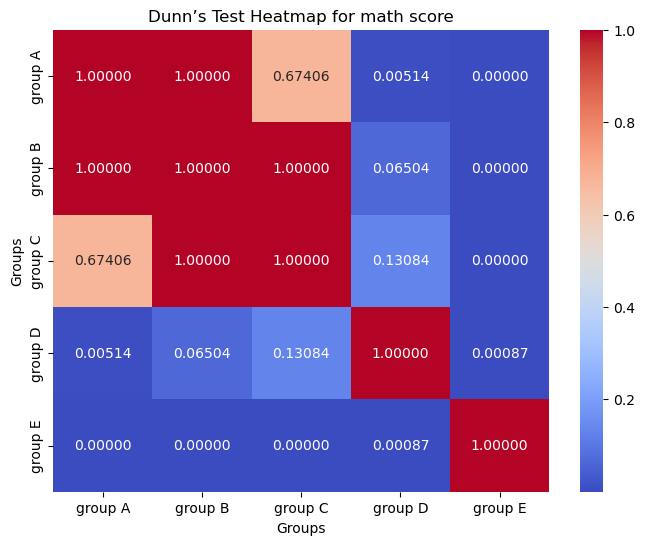


Dunn’s Test for reading score:

         group A  group B  group C  group D  group E
group A     1.00     1.00     0.08     0.03     0.00
group B     1.00     1.00     1.00     0.97     0.01
group C     0.08     1.00     1.00     1.00     0.11
group D     0.03     0.97     1.00     1.00     0.40
group E     0.00     0.01     0.11     0.40     1.00


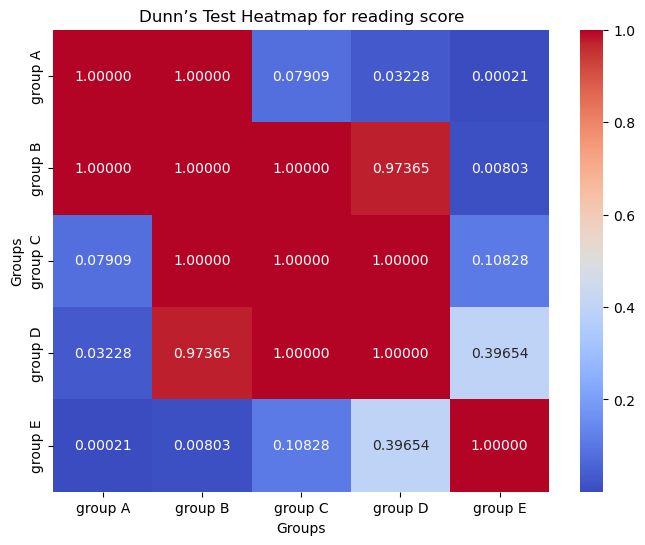


Dunn’s Test for writing score:

         group A  group B  group C  group D  group E
group A     1.00     0.82     0.04     0.00     0.00
group B     0.82     1.00     1.00     0.05     0.01
group C     0.04     1.00     1.00     0.77     0.20
group D     0.00     0.05     0.77     1.00     1.00
group E     0.00     0.01     0.20     1.00     1.00


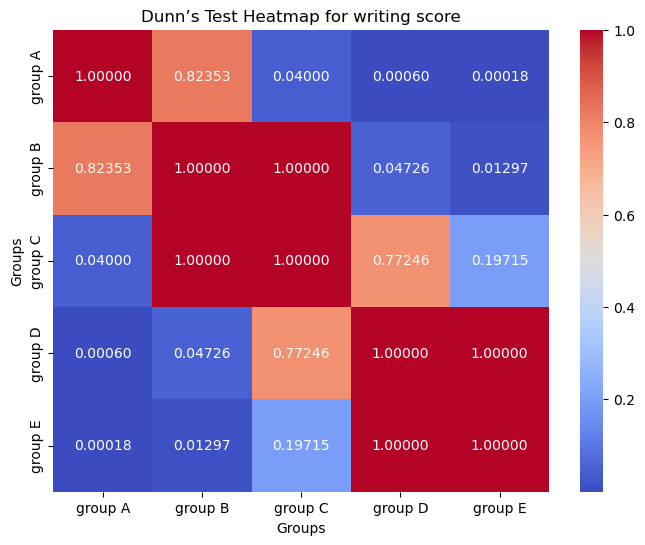

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each score type
for score in ['math score', 'reading score', 'writing score']:
    # Run Dunn's post-hoc test
    posthoc = sp.posthoc_dunn(df, val_col=score, group_col='race/ethnicity', p_adjust='bonferroni')
    
    # Print the result
    print(f"\nDunn’s Test for {score}:\n")
    print(posthoc)
    
    # Create heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(posthoc, annot=True, fmt=".5f", cmap="coolwarm", cbar=True)
    plt.title(f"Dunn’s Test Heatmap for {score}")
    plt.xlabel("Groups")
    plt.ylabel("Groups")
    plt.show()


Math scores: Group E performs significantly differently than others.
Reading scores: Differences are less pronounced, with Group E standing out.
Writing scores: Group E again shows significant differences, along with Group A.

Here’s a summary table highlighting the significant differences from Dunn’s test:

| Score Type     | Significant Differences (p < 0.05) |
|---------------|----------------------------------|
| **Math Score** | Group E vs. A, B, C, D  |
|               | Group D vs. A, E |
| **Reading Score** | Group E vs. A, B  |
|               | Group A vs. D |
| **Writing Score** | Group E vs. A, B, C  |
|               | Group A vs. C, D, E |
|               | Group B vs. D, E |

### Key Insights:
- **Group E** consistently shows the most significant differences across all subjects, suggesting their performance deviates from other groups.
- **Group A** also shows some unique variations, particularly in writing and reading.
- **Group B, C, and D** are more similar in performance, with fewer significant differences.

## Parental Level

In [69]:
parental_df = df['parental level of education'].value_counts().reset_index()
parental_df.columns = ['Parental Level of Education', 'Count']
parental_df


,Parental Level of Education,Count
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


In [70]:
parental_grouped = df.groupby('parental level of education')[['math score', 'writing score', 'reading score']].agg(['mean', 'median','std'])
parental_grouped = parental_grouped.round(2).T
pd.options.display.float_format = "{:.2f}".format
parental_grouped

parental level of education  associate's degree  bachelor's degree  \
math score    mean                        67.88              69.39   
              median                      67.00              68.00   
              std                         15.11              14.94   
writing score mean                        69.90              73.38   
              median                      70.50              74.00   
              std                         14.31              14.73   
reading score mean                        70.93              73.00   
              median                      72.50              73.00   
              std                         13.87              14.29   

parental level of education  high school  master's degree  some college  \
math score    mean                 62.14            69.75         67.13   
              median               63.00            73.00         67.50   
              std                  14.54            15.15         14.31   
writing score mean                 62.45            75.68         68.84   
              median               64.00            75.00         70.00   
              std                  14.09            13.73         15.01   
reading score mean                 64.70            75.37         69.46   
              median               66.00            76.00         70.50   
              std                  14.13            13.78         14.06   

parental level of education  some high school  
math score    mean                      63.50  
              median                    65.00  
              std                       15.93  
writing score mean                      64.89  
              median                    66.00  
              std                       15.74  
reading score mean                      66.94  
              median                    67.00  
              std                       15.48

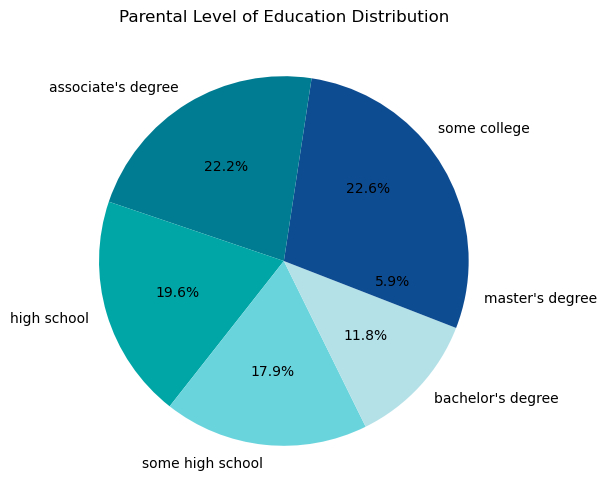

In [71]:
plt.figure(figsize=(6, 6))
plt.pie(parental_df['Count'], labels=parental_df['Parental Level of Education'], autopct='%1.1f%%', colors=sns.color_palette(["#0E4C92", "#007C92", "#00A6A6", "#6AD4DD", "#B4E1E8"]))
plt.title('Parental Level of Education Distribution')
plt.show()

In [72]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

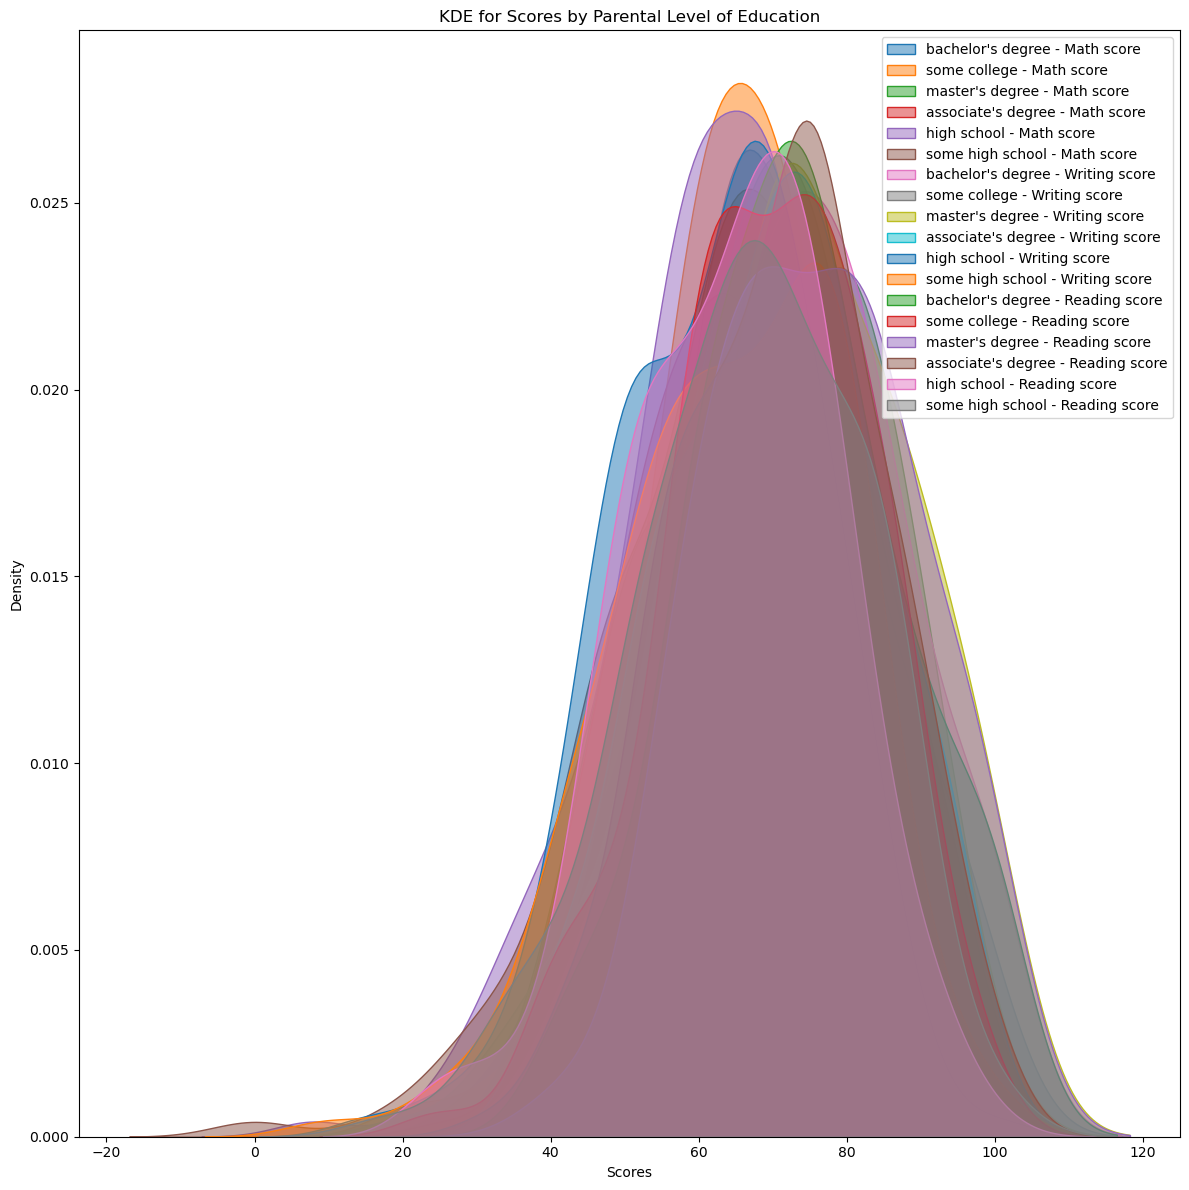

In [73]:
score_columns = ['math score', 'writing score', 'reading score']
parental_grp = ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']

plt.figure(figsize=(12, 12))

# Loop through each score and parental education level
for score in score_columns:
    for ethnicity in parental_grp:
        sns.kdeplot(data=df[df['parental level of education'] == ethnicity], 
                    x=score, 
                    label=f'{ethnicity} - {score.capitalize()}', 
                    fill=True,
                    alpha=0.5)  # Added alpha for better visibility

# Add title and labels
plt.title('KDE for Scores by Parental Level of Education')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

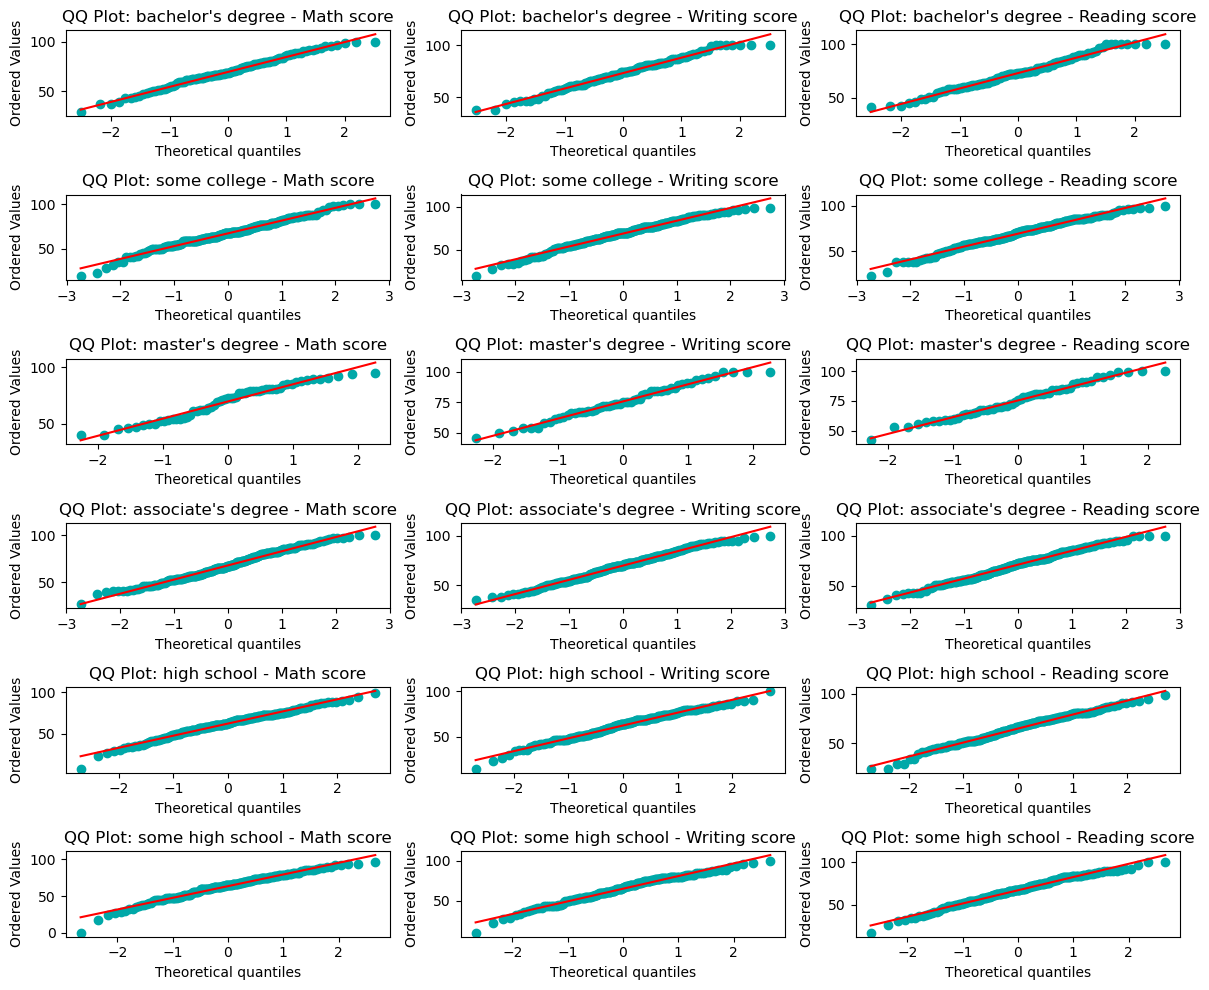

In [74]:
# Create subplots
fig, axes = plt.subplots(len(parental_grp), len(score_columns), figsize=(12, 10))

# Loop through each score and parental education level
for i, parental in enumerate(parental_grp):
    for j, score in enumerate(score_columns):
        stats.probplot(df[df['parental level of education'] == parental][score], dist="norm", plot=axes[i, j])
        axes[i, j].set_title(f'QQ Plot: {parental} - {score.capitalize()}')
        axes[i, j].get_lines()[0].set_color('#00a8a8')

plt.tight_layout()
plt.show()

In [75]:
# Normality Test for Each Parental Education Level
normality_results = []

for score in ['math score', 'reading score', 'writing score']:
    for edu_level in df['parental level of education'].unique():
        group_scores = df[df['parental level of education'] == edu_level][score]
        sw_p = shapiro(group_scores)[1]
        ks_p = kstest((group_scores - group_scores.mean()) / group_scores.std(), 'norm')[1]
        interpretation = "Normal" if sw_p > 0.05 else "Not normal"
        normality_results.append({
            'Parental Education': edu_level,
            'Score Type': score,
            'Shapiro-Wilk p-value': sw_p,
            'Kolmogorov-Smirnov p-value': ks_p,
            'Interpretation': interpretation
            
        })

normality_df = pd.DataFrame(normality_results)
normality_df


,Parental Education,Score Type,Shapiro-Wilk p-value,Kolmogorov-Smirnov p-value,Interpretation
0,bachelor's degree,math score,0.60,0.79,Normal
1,some college,math score,0.10,0.32,Normal
2,master's degree,math score,0.03,0.29,Not normal
3,associate's degree,math score,0.04,0.41,Not normal
4,high school,math score,0.07,0.35,Normal
5,some high school,math score,0.01,0.17,Not normal
6,bachelor's degree,reading score,0.12,0.71,Normal
7,some college,reading score,0.04,0.57,Not normal
8,master's degree,reading score,0.39,0.90,Normal
9,associate's degree,reading score,0.15,0.40,Normal


In [76]:
# Kruskal-Wallis Test for Academic Scores across Parental Education Levels
kruskal_results = []

for score in ['math score', 'reading score', 'writing score']:
    groups = [df[df['parental level of education'] == edu_level][score] for edu_level in df['parental level of education'].unique()]
    stat, p = kruskal(*groups)
    kruskal_results.append({'Score Type': score, 'Kruskal-Wallis Statistic': stat, 'p-value': p})

kruskal_df = pd.DataFrame(kruskal_results)
kruskal_df


,Score Type,Kruskal-Wallis Statistic,p-value
0,math score,26.51,0.00
1,reading score,38.66,0.00
2,writing score,62.33,0.00


- Since p-values for all three scores (math, reading, writing) are < 0.05, we reject H₀₃.
- Conclusion: There is a significant difference in academic performance based on parental education level.

In [77]:
# one tailed mann whitney

# Define groups
higher_edu = df[df['parental level of education'].isin(["bachelor's degree", "master's degree"])]
lower_edu = df[~df['parental level of education'].isin(["bachelor's degree", "master's degree"])]

# Mann-Whitney U test for each score type
mannwhitney_results = []
for score in ['math score', 'reading score', 'writing score']:
    stat, p_value = mannwhitneyu(
        higher_edu[score], lower_edu[score], alternative='greater'
    )
    mannwhitney_results.append({
        'Score Type': score,
        'Mann-Whitney U Statistic': stat,
        'p-value': p_value
    })

# Convert to DataFrame
mannwhitney_df = pd.DataFrame(mannwhitney_results)
mannwhitney_df

,Score Type,Mann-Whitney U Statistic,p-value
0,math score,83897.00,0.00
1,reading score,87241.00,0.00
2,writing score,92247.00,0.00


p-value < alpha

In [78]:
# Function to calculate Cliff’s Delta
def cliffs_delta_manual(x, y):
    x, y = np.array(x), np.array(y)
    n_x, n_y = len(x), len(y)

    greater = np.sum(x[:, None] > y)
    less = np.sum(x[:, None] < y)

    delta = (greater - less) / (n_x * n_y)

    # Interpretation of effect size
    abs_delta = abs(delta)
    if abs_delta > 0.474:
        interpretation = "Large effect"
    elif abs_delta > 0.33:
        interpretation = "Medium effect"
    elif abs_delta > 0.147:
        interpretation = "Small effect"
    else:
        interpretation = "Negligible effect"

    return delta, interpretation

# Split data based on parental education level
higher_edu = df[df['parental level of education'].isin(["bachelor's degree", "master's degree"])]
lower_edu = df[~df['parental level of education'].isin(["bachelor's degree", "master's degree"])]

# Calculate Cliff’s Delta for each score type
cliffs_delta_results = []
for score in ['math score', 'reading score', 'writing score']:
    delta, interpretation = cliffs_delta_manual(higher_edu[score], lower_edu[score])
    cliffs_delta_results.append({
        "Score Type": score,
        "Cliff's Delta": round(delta, 4),
        "Effect Size": interpretation
    })

# Convert to DataFrame
cliffs_delta_df = pd.DataFrame(cliffs_delta_results)
print(cliffs_delta_df)


      Score Type  Cliff's Delta   Effect Size
0     math score           0.15  Small effect
1  reading score           0.20  Small effect
2  writing score           0.27  Small effect


In [79]:
# Perform Dunn's test with Bonferroni correction for each score type
dunn_results = {}

for score in ['math score', 'reading score', 'writing score']:
    dunn_results[score] = sp.posthoc_dunn(
        df, val_col=score, group_col='parental level of education', p_adjust='bonferroni'
    )

# Display the results
dunn_results


{'math score':                     associate's degree  bachelor's degree  high school  \
 associate's degree                1.00               1.00         0.01   
 bachelor's degree                 1.00               1.00         0.00   
 high school                       0.01               0.00         1.00   
 master's degree                   1.00               1.00         0.02   
 some college                      1.00               1.00         0.02   
 some high school                  0.37               0.06         1.00   
 
                     master's degree  some college  some high school  
 associate's degree             1.00          1.00              0.37  
 bachelor's degree              1.00          1.00              0.06  
 high school                    0.02          0.02              1.00  
 master's degree                1.00          1.00              0.20  
 some college                   1.00          1.00              0.75  
 some high school               0

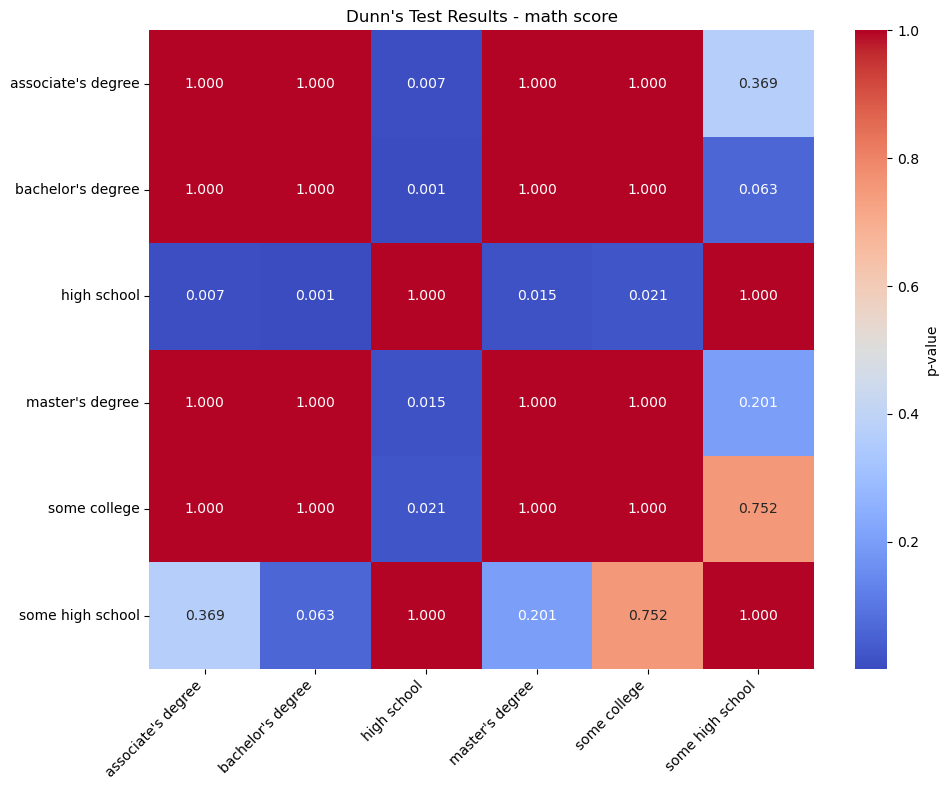

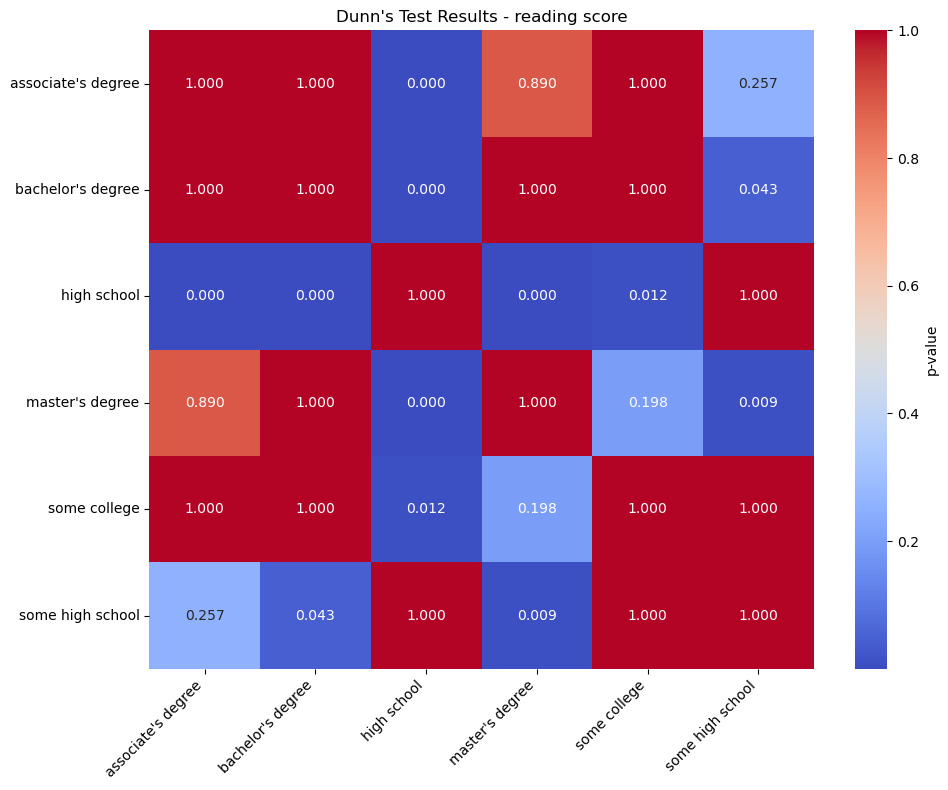

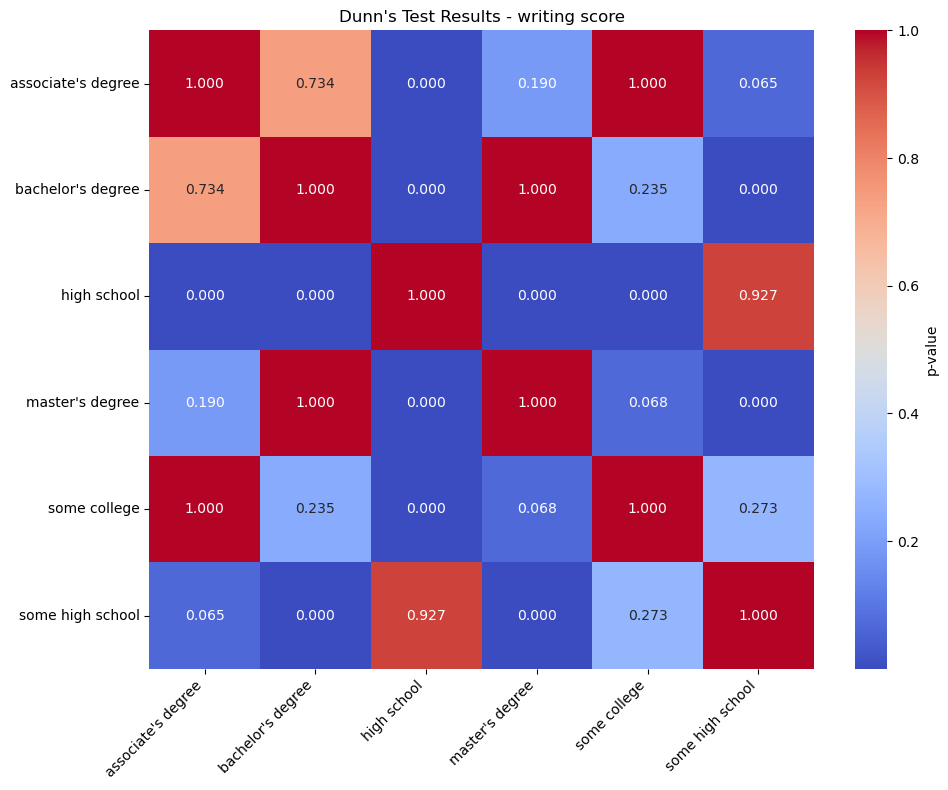

In [80]:
def visualize_dunn_results(df, score_columns):
    """
    Performs Dunn's test and visualizes the results using heatmaps.

    Args:
        df (pd.DataFrame): The input DataFrame.
        score_columns (list): List of score columns to analyze.
    """

    for score in score_columns:
        dunn_result = sp.posthoc_dunn(
            df, val_col=score, group_col='parental level of education', p_adjust='bonferroni'
        )

        plt.figure(figsize=(10, 8))
        sns.heatmap(dunn_result, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'p-value'})
        plt.title(f"Dunn's Test Results - {score}")
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

# Example usage:
# Assuming your DataFrame 'df' is already loaded with the data

score_columns = ['math score', 'reading score', 'writing score']
visualize_dunn_results(df, score_columns)

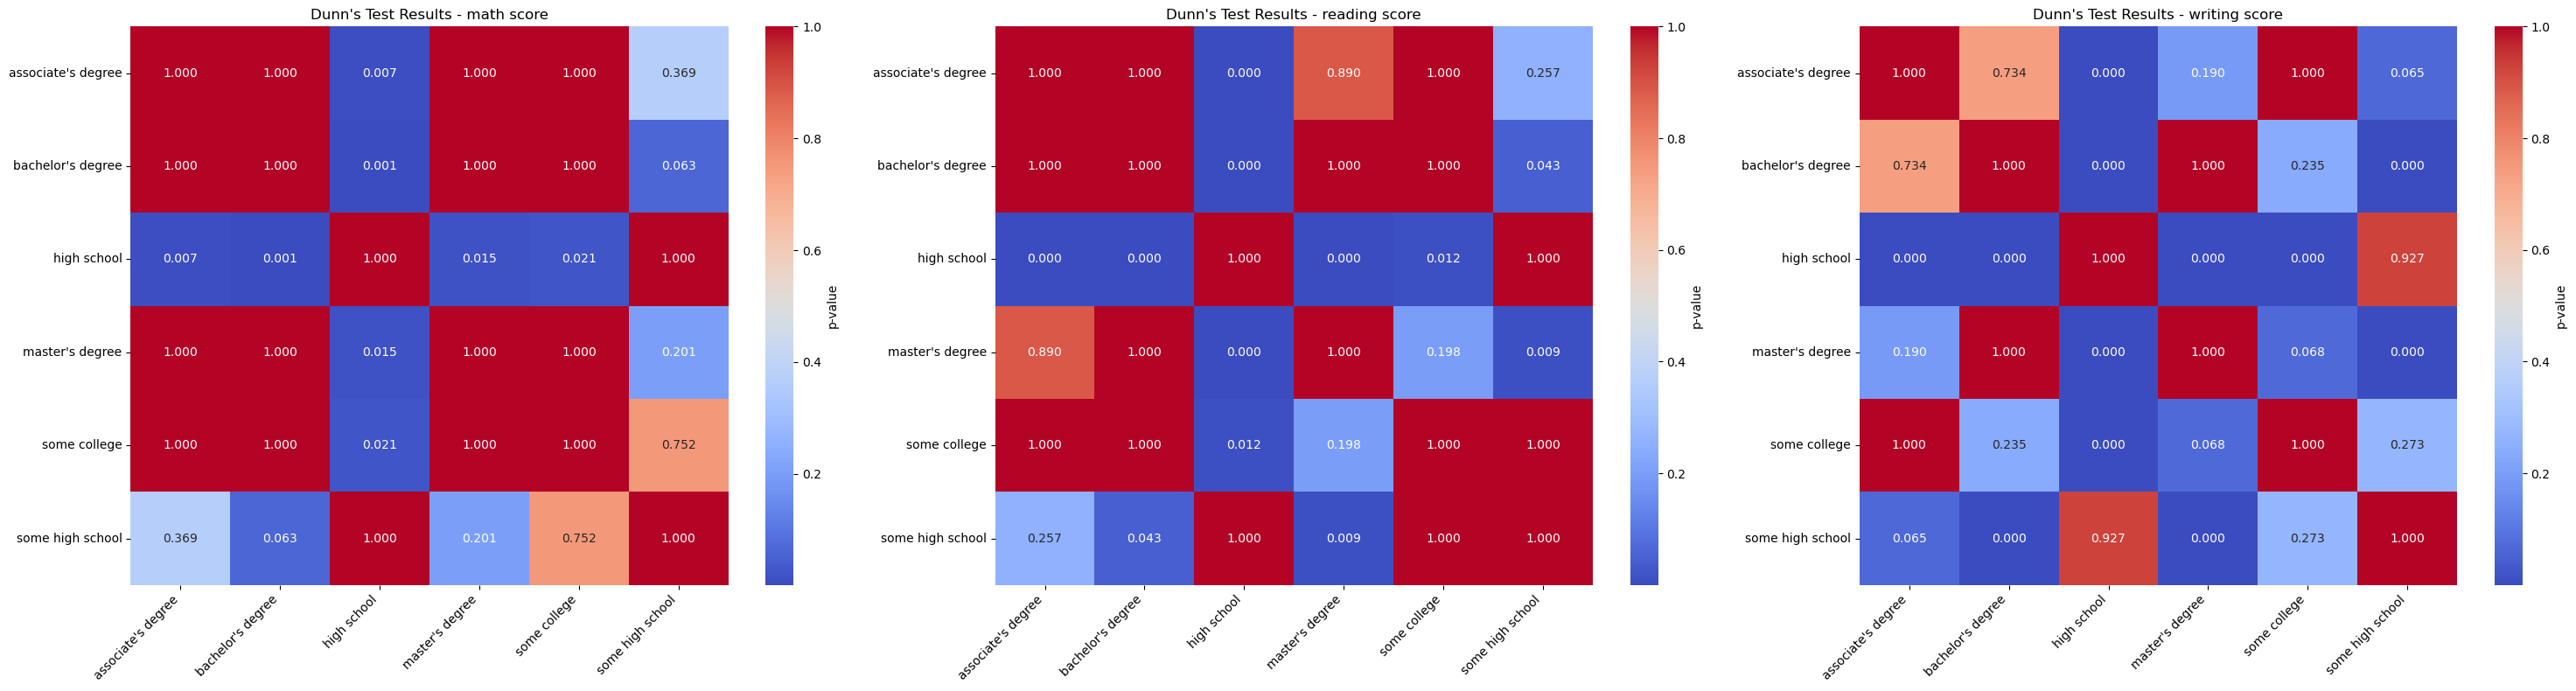

In [81]:
def visualize_dunn_results_horizontal(df, score_columns):
    """
    Performs Dunn's test and visualizes the results using heatmaps in a horizontal layout.

    Args:
        df (pd.DataFrame): The input DataFrame.
        score_columns (list): List of score columns to analyze.
    """

    num_scores = len(score_columns)
    fig, axes = plt.subplots(1, num_scores, figsize=(10 * num_scores, 8))  # 1 row, multiple columns

    for i, score in enumerate(score_columns):
        dunn_result = sp.posthoc_dunn(
            df, val_col=score, group_col='parental level of education', p_adjust='bonferroni'
        )

        sns.heatmap(dunn_result, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'p-value'}, ax=axes[i])
        axes[i].set_title(f"Dunn's Test Results - {score}")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0)

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming your DataFrame 'df' is already loaded with the data

score_columns = ['math score', 'reading score', 'writing score']
visualize_dunn_results_horizontal(df, score_columns)

Interpretation of Dunn’s Post Hoc Test for Parental Education and Student Scores:

Since the **Kruskal-Wallis test** showed significant differences in scores across parental education levels, the **Dunn’s post hoc test** with Bonferroni correction helps determine **which specific groups differ** from each other.

**Key Findings:**
1. **Math Scores:**
   - Students whose parents have a **high school education** score significantly lower than those whose parents have an **associate's, bachelor's, or master's degree** (p-values < 0.05).
   - No significant difference between students whose parents have **associate's, bachelor's, and master's degrees** (p-values > 0.05).
   - **Some high school vs. high school** shows **no significant difference**, indicating similar performance.

2. **Reading Scores:**
   - Students whose parents have **high school education** score significantly lower than those whose parents have an **associate’s, bachelor’s, or master's degree** (p-values < 0.01).
   - **Some high school vs. high school** has no significant difference.
   - No significant difference between **bachelor's and master's degree groups** (p-values > 0.05), suggesting similar performance.

3. **Writing Scores:**
   - Significant gaps between students whose parents have a **high school or lower** education and those with **higher education levels** (p-values < 0.01).
   - No significant difference between **bachelor’s and master’s degree groups**, implying similar advantages in academic performance.


**Conclusion:**
- Students with parents who have a **bachelor’s degree or higher** tend to perform significantly better in **math, reading, and writing** than those with **only a high school or lower education**.
- There is **no major performance difference** between students whose parents hold an **associate’s, bachelor’s, or master’s degree**.
- This supports **H₁₃ and H₁₄**, rejecting **H₀₃ and H₀₄**: **Parental education significantly influences student achievement.**

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_5765/2299491049.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='parental level of education', y=score, palette="Set2")
/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_5765/2299491049.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='parental level of education', y=score, palette="Set2")
/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_5765/2299491049.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='parental level of

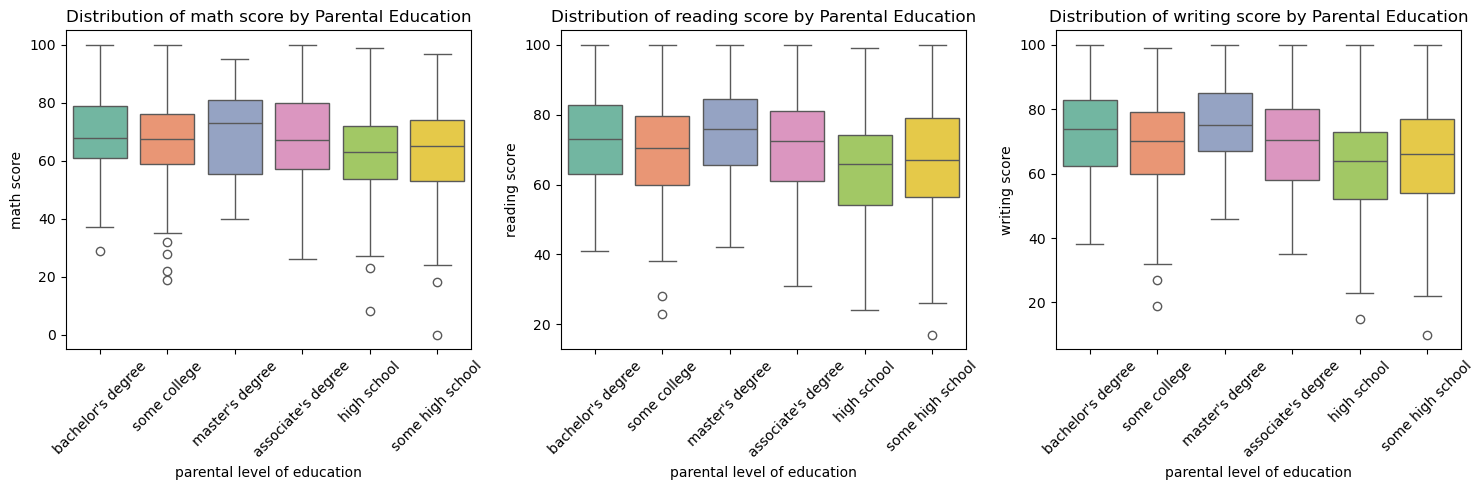

In [82]:
# Set figure size
plt.figure(figsize=(15, 5))

# Define the score types
score_types = ['math score', 'reading score', 'writing score']

# Create a boxplot for each score type
for i, score in enumerate(score_types, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='parental level of education', y=score, palette="Set2")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.title(f'Distribution of {score} by Parental Education')

# Show the plots
plt.tight_layout()
plt.show()


## Lunch

In [83]:
lunch_df = df['lunch'].value_counts().reset_index()
lunch_df.columns = ['lunch', 'Count']
lunch_df


,lunch,Count
0,standard,645
1,free/reduced,355


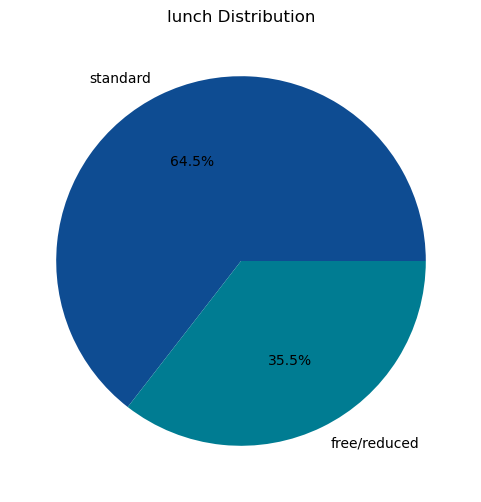

In [84]:
plt.figure(figsize=(6, 6))
plt.pie(lunch_df['Count'], labels=lunch_df['lunch'], autopct='%1.1f%%', colors=sns.color_palette(["#0E4C92", "#007C92", "#00A6A6", "#6AD4DD", "#B4E1E8"]))
plt.title('lunch Distribution')
plt.show()

In [85]:
lunch_grouped = df.groupby('lunch')[['math score', 'writing score', 'reading score']].agg(['mean', 'median','std'])
lunch_grouped = lunch_grouped.round(2).T
pd.options.display.float_format = "{:.2f}".format
lunch_grouped

lunch                 free/reduced  standard
math score    mean           58.92     70.03
              median         60.00     69.00
              std            15.16     13.65
writing score mean           63.02     70.82
              median         64.00     72.00
              std            15.43     14.34
reading score mean           64.65     71.65
              median         65.00     72.00
              std            14.90     13.83

In [86]:
# Normality Test for Each Lunch Group on Each Score
normality_results = []
for score in ['math score', 'reading score', 'writing score']:
    for lunch in df['lunch'].unique():
        group_scores = df[df['lunch'] == lunch][score]
        sw_p = shapiro(group_scores)[1]
        ks_p = kstest((group_scores - group_scores.mean()) / group_scores.std(), 'norm')[1]
        interpretation = "Normal" if sw_p > 0.05 else "Not normal"
        normality_results.append({
            'Lunch Type': lunch,
            'Score Type': score,
            'Shapiro-Wilk p-value': sw_p,
            'Kolmogorov-Smirnov p-value': ks_p,
            'interpretation': interpretation
        })

normality_df = pd.DataFrame(normality_results)
normality_df

,Lunch Type,Score Type,Shapiro-Wilk p-value,Kolmogorov-Smirnov p-value,interpretation
0,standard,math score,0.02,0.50,Not normal
1,free/reduced,math score,0.07,0.55,Normal
2,standard,reading score,0.00,0.20,Not normal
3,free/reduced,reading score,0.13,0.48,Normal
4,standard,writing score,0.00,0.10,Not normal
5,free/reduced,writing score,0.15,0.76,Normal


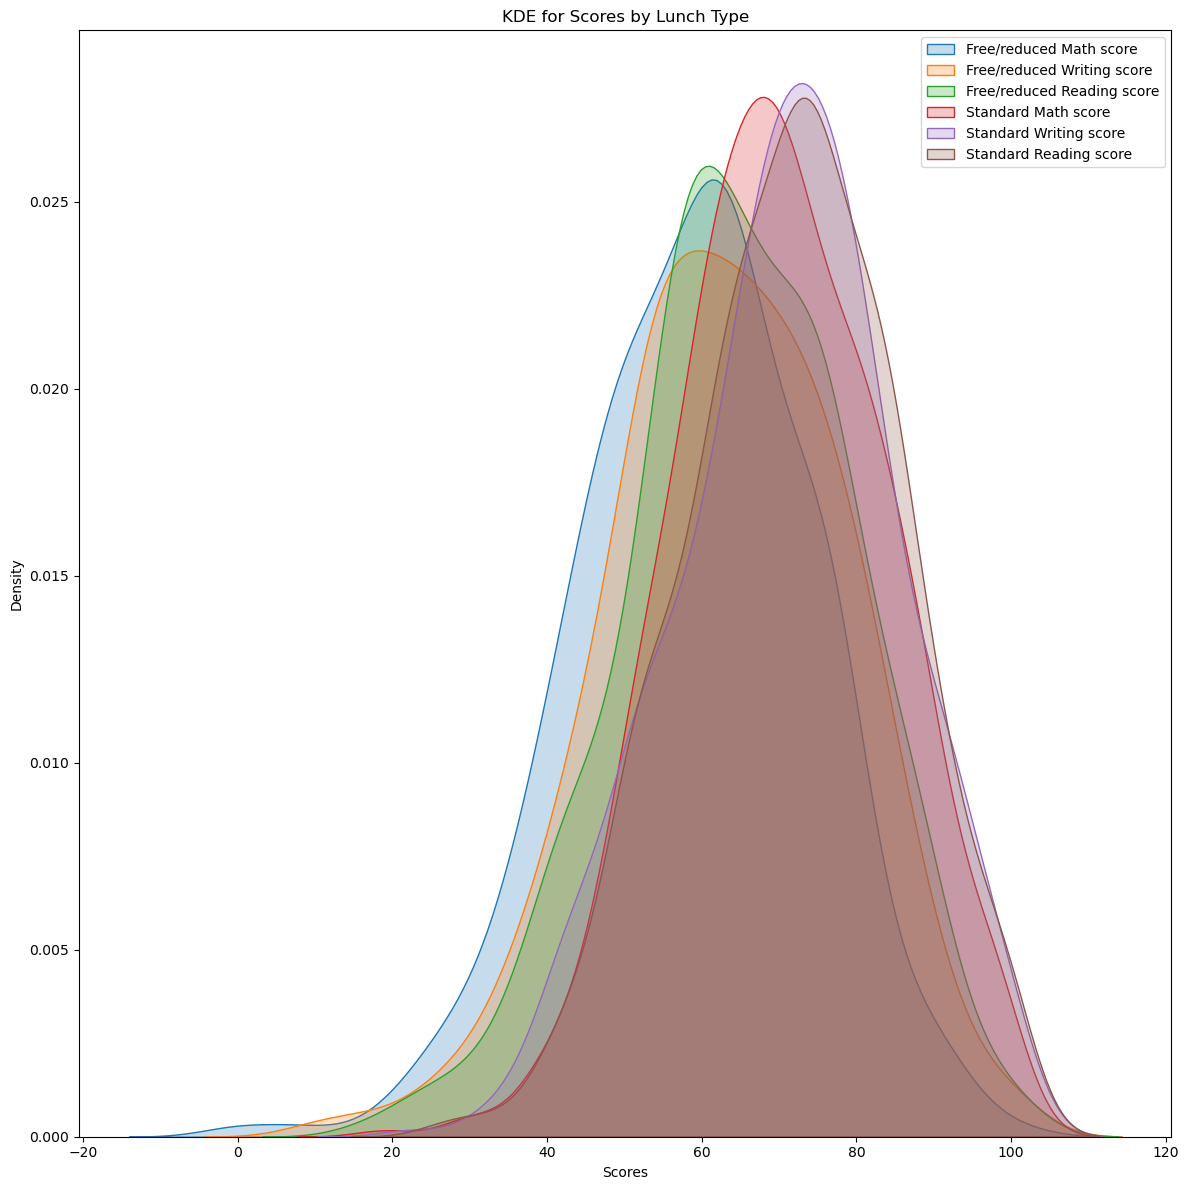

In [87]:
# List of columns to analyze
score_columns = ['math score', 'writing score', 'reading score']
lunches = ['free/reduced', 'standard']

plt.figure(figsize=(12, 12))

# Loop through each score and lunch category
for lunch in lunches:
    for score in score_columns:
        sns.kdeplot(data=df[df['lunch'] == lunch], x=score, label=f'{lunch.capitalize()} {score.capitalize()}', fill=True)

# Add title and labels
plt.title('KDE for Scores by Lunch Type')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


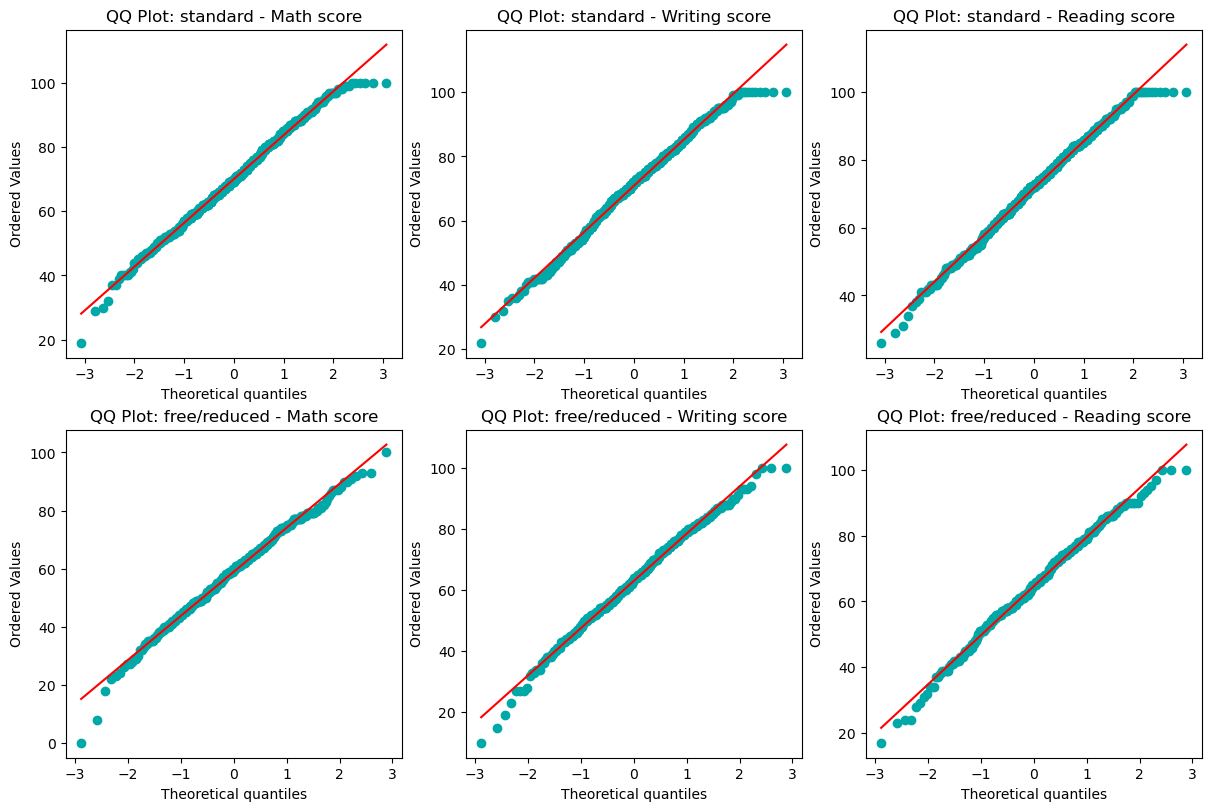

In [88]:
# Get unique categories from 'lunch'
lunch_categories = df['lunch'].unique()
score_columns = ['math score', 'writing score', 'reading score']

# Create well-structured subplots
fig, axes = plt.subplots(len(lunch_categories), len(score_columns), figsize=(12, 8), constrained_layout=True)

# If there is only one category, convert axes to an array to avoid errors
if len(lunch_categories) == 1:
    axes = np.array([axes])

# Loop through each lunch category and score
for i, lunch in enumerate(lunch_categories):
    for j, score in enumerate(score_columns):
        stats.probplot(df[df['lunch'] == lunch][score], dist="norm", plot=axes[i, j])
        axes[i, j].set_title(f'QQ Plot: {lunch} - {score.capitalize()}')
        axes[i, j].get_lines()[0].set_color('#00a8a8')

plt.show()


In [89]:
## 1
# Mann-Whitney U (two-tailed) & Cliff's Delta
for score in score_types:
    standard_scores = df[df["lunch"] == "standard"][score]
    free_reduced_scores = df[df["lunch"] == "free/reduced"][score]

    # Two-tailed Mann-Whitney U test (any difference)
    stat, p = mannwhitneyu(standard_scores, free_reduced_scores, alternative='two-sided')

    # Cliff's Delta
    delta, interpretation = cliffs_delta_manual(free_reduced_scores, standard_scores)

    print(f"\n{score}:")
    print(f"  Mann-Whitney U: Statistic = {stat:.3f}, p-value = {p:.3f}")
    print(f"  Cliff's Delta: Delta = {delta:.3f} ({interpretation})")

    # Interpretation for general impact
    if p < 0.05:
        print(f"  Conclusion: The type of lunch program has a significant impact on academic performance.")
    else:
        print(f"  Conclusion: The type of lunch program does NOT significantly impact academic performance.")



math score:
  Mann-Whitney U: Statistic = 161077.000, p-value = 0.000
  Cliff's Delta: Delta = -0.407 (Medium effect)
  Conclusion: The type of lunch program has a significant impact on academic performance.

reading score:
  Mann-Whitney U: Statistic = 144848.000, p-value = 0.000
  Cliff's Delta: Delta = -0.265 (Small effect)
  Conclusion: The type of lunch program has a significant impact on academic performance.

writing score:
  Mann-Whitney U: Statistic = 147389.000, p-value = 0.000
  Cliff's Delta: Delta = -0.287 (Small effect)
  Conclusion: The type of lunch program has a significant impact on academic performance.


In [90]:
## 2 

# Function to calculate Cliff's Delta
def cliffs_delta_manual(x, y):
    x, y = np.array(x), np.array(y)
    n_x, n_y = len(x), len(y)
    
    greater = np.sum(x[:, None] > y)
    less = np.sum(x[:, None] < y)
    
    delta = (greater - less) / (n_x * n_y)

    # Interpretation
    abs_delta = abs(delta)
    if abs_delta > 0.474:
        interpretation = "Large effect"
    elif abs_delta > 0.33:
        interpretation = "Medium effect"
    elif abs_delta > 0.147:
        interpretation = "Small effect"
    else:
        interpretation = "Negligible effect"

    return delta, interpretation

# Score types
score_types = ["math score", "reading score", "writing score"]

# Mann-Whitney U (one-tailed) & Cliff's Delta
for score in score_types:
    standard_scores = df[df["lunch"] == "standard"][score]
    free_reduced_scores = df[df["lunch"] == "free/reduced"][score]

    # One-tailed Mann-Whitney U test (assumes "standard" > "free/reduced")
    stat, p = mannwhitneyu(standard_scores, free_reduced_scores, alternative='greater')

    # Cliff's Delta
    delta, interpretation = cliffs_delta_manual(free_reduced_scores, standard_scores)

    print(f"\n{score}:")
    print(f"  Mann-Whitney U: Statistic = {stat:.3f}, p-value = {p:.3f}")
    print(f"  Cliff's Delta: Delta = {delta:.3f} ({interpretation})")

    # Interpretation for H₀₇ vs H₁₇
    if p < 0.05 and delta < 0:
        print(f"  Conclusion: H₀₇ rejected, H₁₇ accepted. Students with free/reduced lunch scored significantly lower.")
    elif p < 0.05 and delta > 0:
        print(f"  Conclusion: H₀₇ rejected, but scores do not align with H₁₇.")
    else:
        print(f"  Conclusion: H₀₇ failed to be rejected.")



math score:
  Mann-Whitney U: Statistic = 161077.000, p-value = 0.000
  Cliff's Delta: Delta = -0.407 (Medium effect)
  Conclusion: H₀₇ rejected, H₁₇ accepted. Students with free/reduced lunch scored significantly lower.

reading score:
  Mann-Whitney U: Statistic = 144848.000, p-value = 0.000
  Cliff's Delta: Delta = -0.265 (Small effect)
  Conclusion: H₀₇ rejected, H₁₇ accepted. Students with free/reduced lunch scored significantly lower.

writing score:
  Mann-Whitney U: Statistic = 147389.000, p-value = 0.000
  Cliff's Delta: Delta = -0.287 (Small effect)
  Conclusion: H₀₇ rejected, H₁₇ accepted. Students with free/reduced lunch scored significantly lower.


In [91]:
# mannwhitneyu-Wallis Test
mannwhitneyu_results = []
for score in ['math score', 'reading score', 'writing score']:
    group1 = df[df['lunch'] == "standard"][score]
    group2 = df[df['lunch'] == "free/reduced"][score]
    stat, p = mannwhitneyu(group1, group2, alternative='greater')

    mannwhitneyu_results.append({'Score Type': score, 'Mann Whitney U Statistic': stat, 'p-value': p})

mannwhitneyu_df = pd.DataFrame(mannwhitneyu_results)
mannwhitneyu_df

,Score Type,Mann Whitney U Statistic,p-value
0,math score,161077.00,0.00
1,reading score,144848.00,0.00
2,writing score,147389.00,0.00


In [92]:
# Function to calculate Cliff's Delta
def cliffs_delta_manual(x, y):
    x, y = np.array(x), np.array(y)
    n_x, n_y = len(x), len(y)

    greater = np.sum(x[:, None] > y)
    less = np.sum(x[:, None] < y)

    delta = (greater - less) / (n_x * n_y)

    # Interpretation based on effect size
    abs_delta = abs(delta)
    if abs_delta > 0.474:
        interpretation = "Large effect"
    elif abs_delta > 0.33:
        interpretation = "Medium effect"
    elif abs_delta > 0.147:
        interpretation = "Small effect"
    else:
        interpretation = "Negligible effect"

    return delta, interpretation

# Score types
score_types = ["math score", "reading score", "writing score"]

# Calculate Cliff’s Delta for each score type
for score in score_types:
    delta, interpretation = cliffs_delta_manual(
        df[df["lunch"] == "standard"][score],
        df[df["lunch"] == "free/reduced"][score]
    )
    print(f"{score}: Cliff's Delta = {delta:.3f} ({interpretation})")

math score: Cliff's Delta = 0.407 (Medium effect)
reading score: Cliff's Delta = 0.265 (Small effect)
writing score: Cliff's Delta = 0.287 (Small effect)


## Test Preparation

In [93]:
test_prep_df = df['test preparation course'].value_counts().reset_index()
test_prep_df.columns = ['Test Preparation', 'Count']
test_prep_df

,Test Preparation,Count
0,none,642
1,completed,358


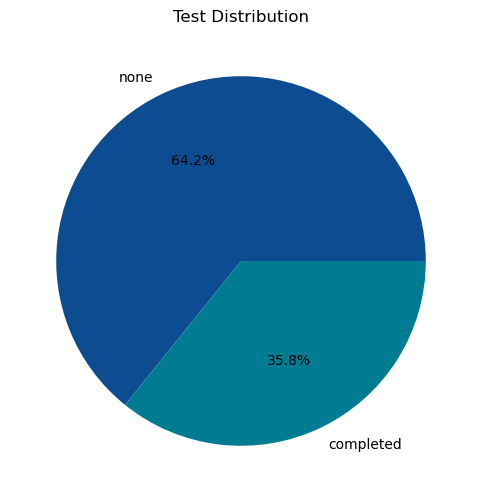

In [94]:
plt.figure(figsize=(6, 6))
plt.pie(test_prep_df['Count'], labels=test_prep_df['Test Preparation'], autopct='%1.1f%%', colors=sns.color_palette(["#0E4C92", "#007C92", "#00A6A6", "#6AD4DD", "#B4E1E8"]))
plt.title('Test Distribution')
plt.show()

In [95]:
test_grouped = df.groupby('test preparation course')[['math score', 'writing score', 'reading score']].agg(['mean', 'median','std'])
test_grouped = test_grouped.round(2).T
pd.options.display.float_format = "{:.2f}".format
test_grouped

test preparation course  completed  none
math score    mean           69.70 64.08
              median         69.00 64.00
              std            14.44 15.19
writing score mean           74.42 64.50
              median         76.00 65.00
              std            13.38 15.00
reading score mean           73.89 66.53
              median         75.00 67.00
              std            13.64 14.46

In [96]:
normality_results = []

for score in ['math score', 'reading score', 'writing score']:
    for race in df['test preparation course'].unique():
        group_scores = df[df['test preparation course'] == race][score]
        sw_p = shapiro(group_scores)[1]
        ks_p = kstest((group_scores - group_scores.mean()) / group_scores.std(), 'norm')[1]
        interpretation = "Normal" if sw_p > 0.05 else "Not normal"

        normality_results.append({
            'test preparation course': race,
            'Score Type': score,
            'Shapiro-Wilk p-value': sw_p,
            'Kolmogorov-Smirnov p-value': ks_p,
            'Interpretation': interpretation
        })

normality_df = pd.DataFrame(normality_results)
normality_df


,test preparation course,Score Type,Shapiro-Wilk p-value,Kolmogorov-Smirnov p-value,Interpretation
0,none,math score,0.00,0.35,Not normal
1,completed,math score,0.14,0.92,Normal
2,none,reading score,0.02,0.30,Not normal
3,completed,reading score,0.00,0.10,Not normal
4,none,writing score,0.04,0.35,Not normal
5,completed,writing score,0.00,0.17,Not normal


In [97]:
df['test preparation course'].unique()


array(['none', 'completed'], dtype=object)

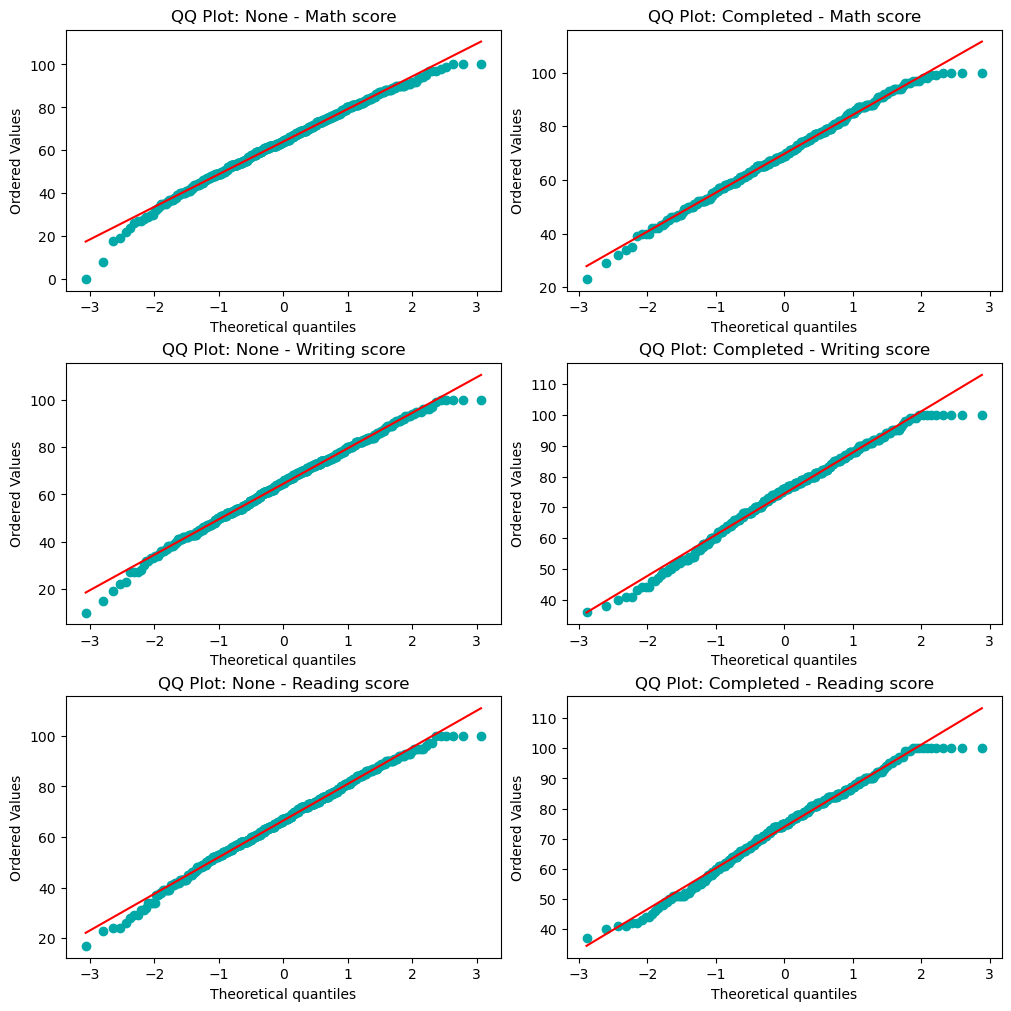

In [98]:
# Define score columns and test preparation course categories
score_columns = ['math score', 'writing score', 'reading score']
tests = ['none', 'completed']

# Create subplots
fig, axes = plt.subplots(len(score_columns), len(tests), figsize=(10, 10), constrained_layout=True)

# Jika hanya satu kategori, ubah axes menjadi array agar tidak error
if len(score_columns) == 1 or len(tests) == 1:
    axes = np.array(axes).reshape(len(score_columns), len(tests))

# Loop through each score and test preparation course
for i, score in enumerate(score_columns):
    for j, test_prep in enumerate(tests):
        data = df[df['test preparation course'] == test_prep][score]
        
        # QQ plot
        stats.probplot(data, dist="norm", plot=axes[i, j])
        axes[i, j].get_lines()[0].set_color('#00a8a8')
        axes[i, j].set_title(f'QQ Plot: {test_prep.capitalize()} - {score.capitalize()}')

plt.show()


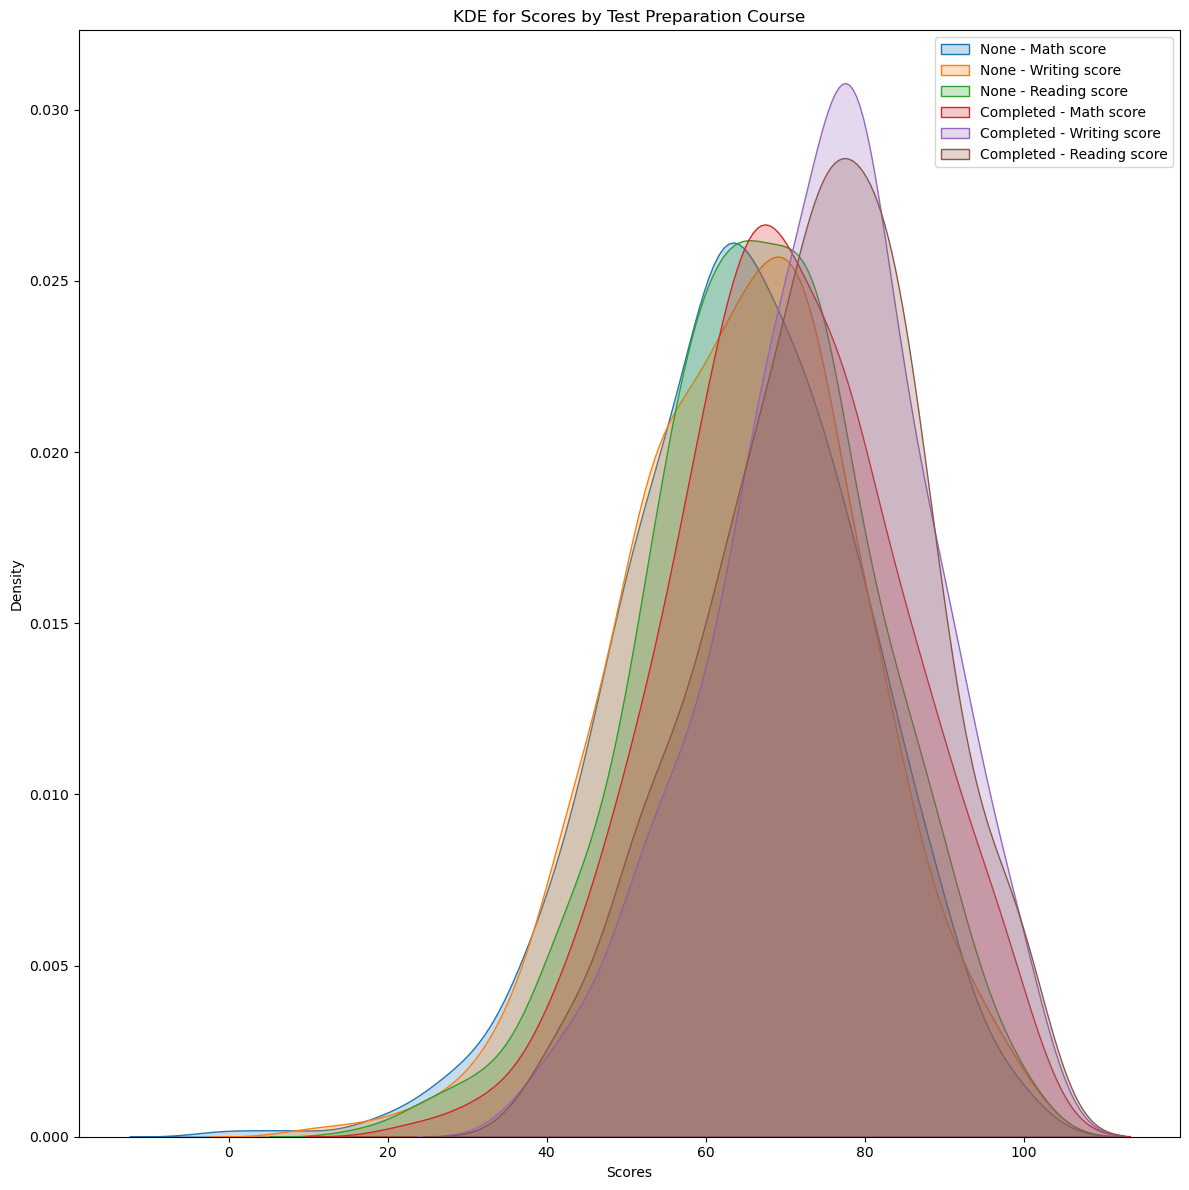

In [99]:
# List of columns to analyze
score_columns = ['math score', 'writing score', 'reading score']
test_prep_courses = ['none', 'completed']

plt.figure(figsize=(12, 12))

# Loop through each test preparation course and score
for test_prep in test_prep_courses:
    for score in score_columns:
        sns.kdeplot(
            data=df[df['test preparation course'] == test_prep], 
            x=score, 
            label=f'{test_prep.capitalize()} - {score.capitalize()}', 
            fill=True
        )

# Add title and labels
plt.title('KDE for Scores by Test Preparation Course')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [100]:
# Store statistical test results
test_results = []

# Perform statistical tests for each score
for score in ['math score', 'reading score', 'writing score']:
    no_prep = df[df['test preparation course'] == 'none'][score]
    completed_prep = df[df['test preparation course'] == 'completed'][score]

    # Normality test using Shapiro-Wilk
    _, p_normal_no = shapiro(no_prep)
    _, p_normal_completed = shapiro(completed_prep)
    
    if p_normal_no > 0.05 and p_normal_completed > 0.05:
        # Data is normal → use one-tailed t-test
        stat, p_value = ttest_ind(completed_prep, no_prep, alternative='greater', equal_var=False)
        test_type = "T-test (one-tailed)"
    else:
        # Data is not normal → use Mann-Whitney U test
        stat, p_value = mannwhitneyu(completed_prep, no_prep, alternative='greater')
        test_type = "Mann-Whitney U (one-tailed)"

    test_results.append({
        'Score Type': score, 
        'Test': test_type,
        'Statistic': round(stat, 4), 
        'p-value': round(p_value, 4)
    })

# Convert results into a DataFrame for better readability
test_results_df = pd.DataFrame(test_results)
test_results_df

,Score Type,Test,Statistic,p-value
0,math score,Mann-Whitney U (one-tailed),138412.00,0.00
1,reading score,Mann-Whitney U (one-tailed),148497.00,0.00
2,writing score,Mann-Whitney U (one-tailed),158809.00,0.00


In [101]:
# Function to calculate Cliff's Delta
def cliffs_delta(x, y):
    x, y = np.array(x), np.array(y)
    n_x, n_y = len(x), len(y)

    greater = np.sum(x[:, None] > y)
    less = np.sum(x[:, None] < y)

    delta = (greater - less) / (n_x * n_y)

    # Interpretation based on effect size
    abs_delta = abs(delta)
    if abs_delta > 0.474:
        interpretation = "Large effect"
    elif abs_delta > 0.33:
        interpretation = "Medium effect"
    elif abs_delta > 0.147:
        interpretation = "Small effect"
    else:
        interpretation = "Negligible effect"

    return delta, interpretation

# Store test results
test_results = []

# Statistical tests for each score
for score in ['math score', 'reading score', 'writing score']:
    no_prep = df[df['test preparation course'] == 'none'][score]
    completed_prep = df[df['test preparation course'] == 'completed'][score]

    # Normality test using Shapiro-Wilk
    _, p_normal_no = shapiro(no_prep)
    _, p_normal_completed = shapiro(completed_prep)

    if p_normal_no > 0.05 and p_normal_completed > 0.05:
        # Normal data → One-tailed T-test
        stat, p_value = ttest_ind(completed_prep, no_prep, alternative='greater', equal_var=False)
        test_type = "T-test (one-tailed)"
    else:
        # Non-normal data → Mann-Whitney U test
        stat, p_value = mannwhitneyu(completed_prep, no_prep, alternative='greater')
        test_type = "Mann-Whitney U (one-tailed)"

    # Calculate Cliff's Delta
    delta, effect_size = cliffs_delta(completed_prep, no_prep)

    # Store results
    test_results.append({
        'Score Type': score, 
        'Test': test_type,
        'Statistic': round(stat, 4), 
        'p-value': round(p_value, 4),
        "Cliff's Delta": round(delta, 4),
        "Effect Size": effect_size
    })

# Convert to DataFrame
test_results_df = pd.DataFrame(test_results)
test_results_df


,Score Type,Test,Statistic,p-value,Cliff's Delta,Effect Size
0,math score,Mann-Whitney U (one-tailed),138412.00,0.00,0.20,Small effect
1,reading score,Mann-Whitney U (one-tailed),148497.00,0.00,0.29,Small effect
2,writing score,Mann-Whitney U (one-tailed),158809.00,0.00,0.38,Medium effect


From the Mann-Whitney U test results (since the data is not normally distributed), we see that all p-values = 0.00, which means the results are highly significant (p < 0.05).
Thus, We reject H₀₁ and accept H₁₁ → Students who completed the test preparation course scored significantly higher in math, reading, and writing compared to those who did not take the course.
However only writing score that effect size is medium while the other is small
